<a href="https://colab.research.google.com/github/rich-hyun/kuggle_project/blob/main/kuggle_project_teamA_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<Kuggle A조 1차 프로젝트>**
201912572 김선진
202010361 최지희
202111863 김재현
202211877 김나연

#1. 파일 가져오기

한글 폰트 다운로드

In [ ]:
!sudo apt-get install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts,

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'

필요한 파일 가져오기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
import warnings
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings("ignore")
파일경로 = 'https://raw.githubusercontent.com/rich-hyun/jae/main/train.csv'
df = pd.read_csv(파일경로)

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


#2. 파일 살펴보기 / 결측치 확인

데이터 살펴보기

In [ ]:
df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38,A,15667000,103680,0.0,3.0,1425,1015
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38,A,15667000,103680,0.0,3.0,1425,1015
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38,A,27304000,184330,0.0,3.0,1425,1015
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38,A,27304000,184330,0.0,3.0,1425,1015
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38,A,27304000,184330,0.0,3.0,1425,1015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   int64  
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

결측치 확인

In [ ]:
df.isnull().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,0
임대보증금,569


<Axes: >

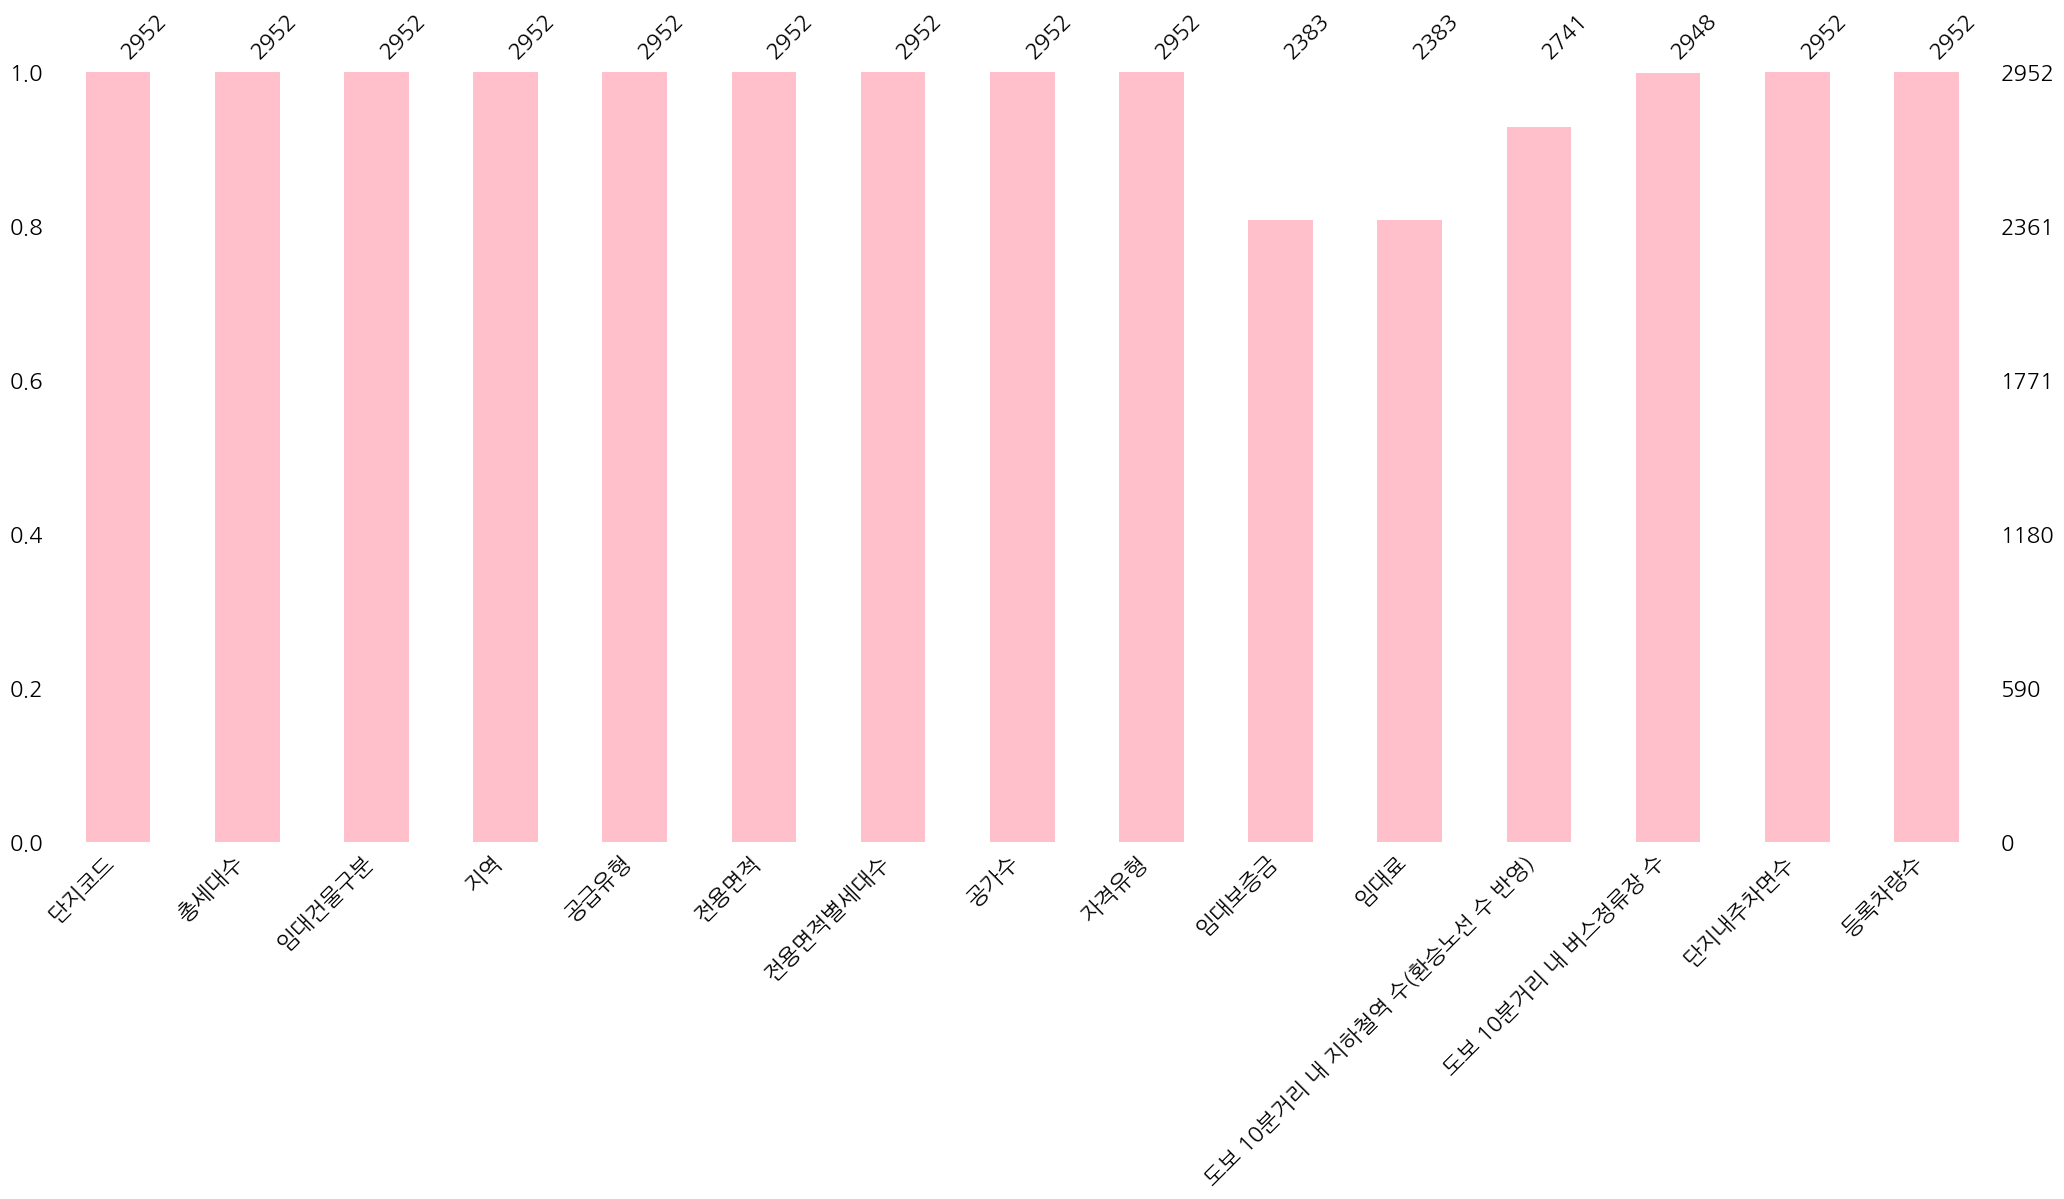

In [ ]:
msno.bar(df.iloc[:, :], color='pink')

적절한 변수 변환

In [ ]:
df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [ ]:
df['임대건물구분']= pd.Categorical(df['임대건물구분'])
df['지역']= pd.Categorical(df['지역'])
df['공급유형']= pd.Categorical(df['공급유형'])
df['자격유형']= pd.Categorical(df['자격유형'])

df['임대보증금']= pd.to_numeric(df['임대보증금'], errors='coerce')
df['임대료']= pd.to_numeric(df['임대료'], errors='coerce')

In [ ]:
df['도보 10분거리 내 지하철역 수(환승노선 수 반영)']= pd.Categorical(df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'])
df['도보 10분거리 내 버스정류장 수']= pd.Categorical(df['도보 10분거리 내 버스정류장 수'])

각 변수별 분포 파악

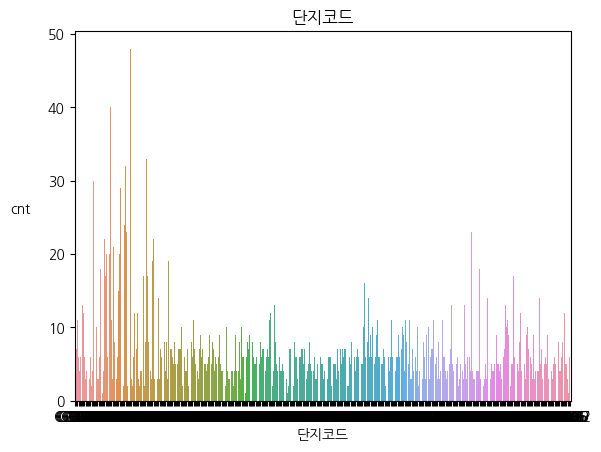

In [ ]:
sns.countplot(data=df, x='단지코드')
plt.ylabel("cnt",rotation=0,labelpad=20)
plt.title("단지코드")
plt.show()

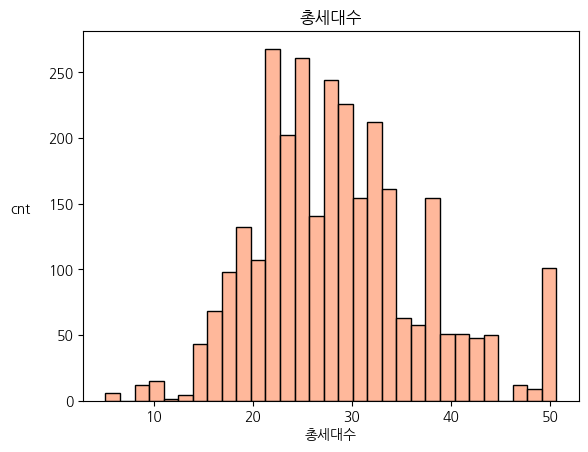

In [ ]:
sns.histplot(np.sqrt(df['총세대수']), color = '#ffa07a')
plt.ylabel("cnt",rotation=0,labelpad=20)
plt.title("총세대수")
plt.show()

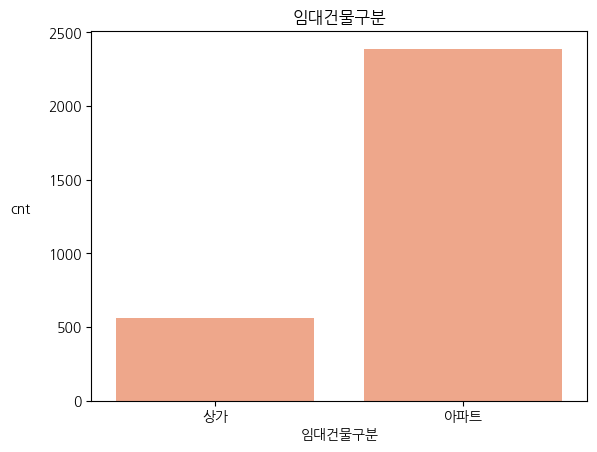

In [ ]:
sns.countplot(data=df, x='임대건물구분', color = '#ffa07a')
plt.ylabel("cnt",rotation=0,labelpad=20)
plt.title("임대건물구분")
plt.show()

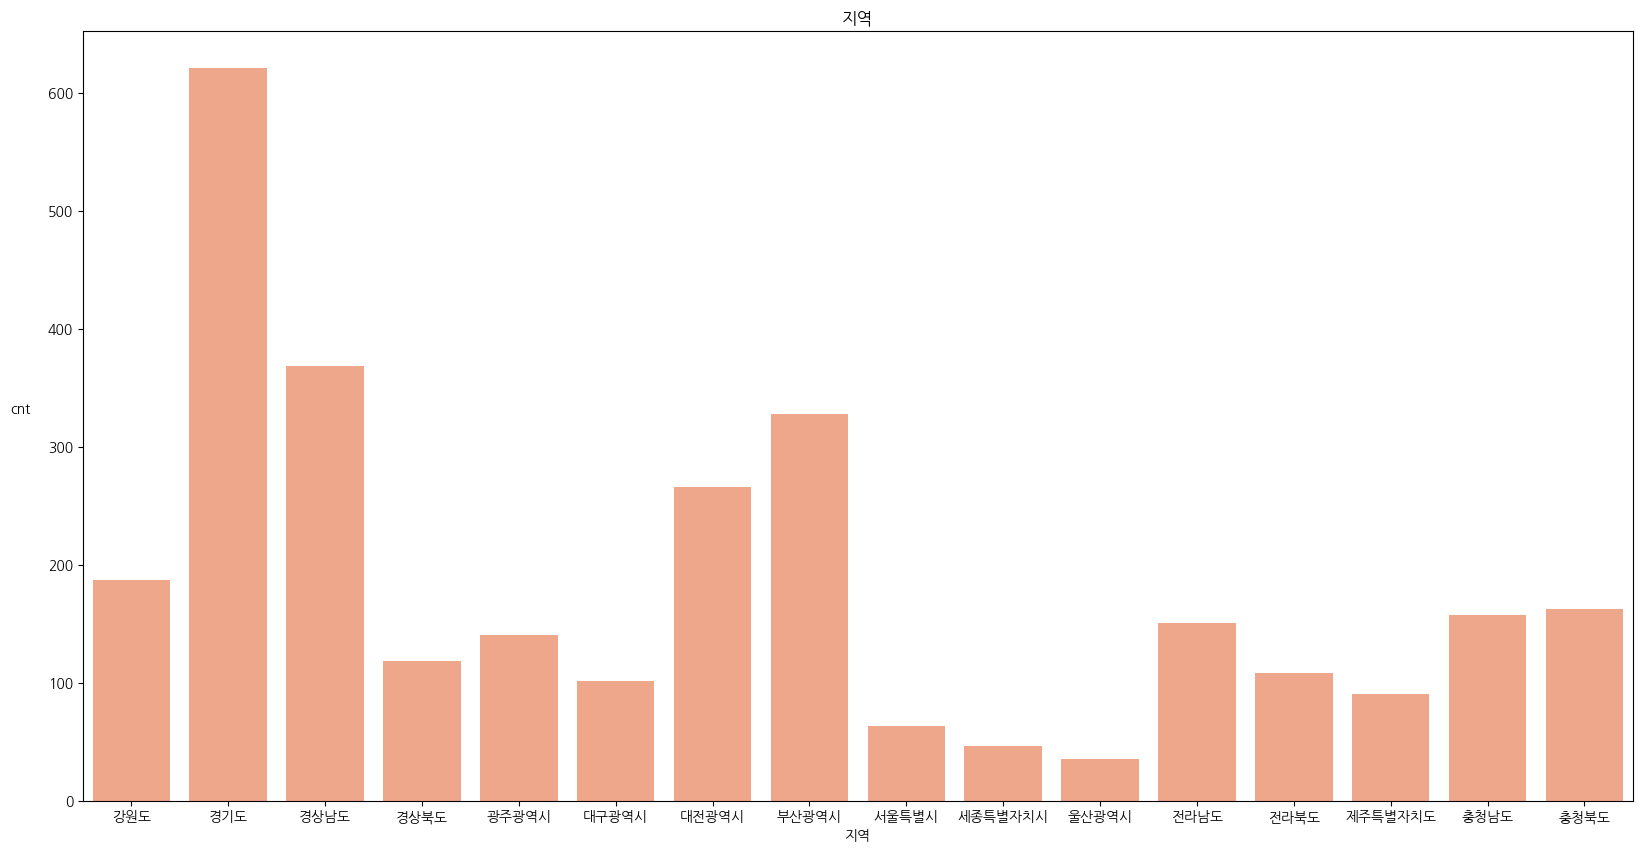

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='지역', color = '#ffa07a')
plt.ylabel("cnt",rotation=0,labelpad=20)
plt.title("지역")
plt.show()

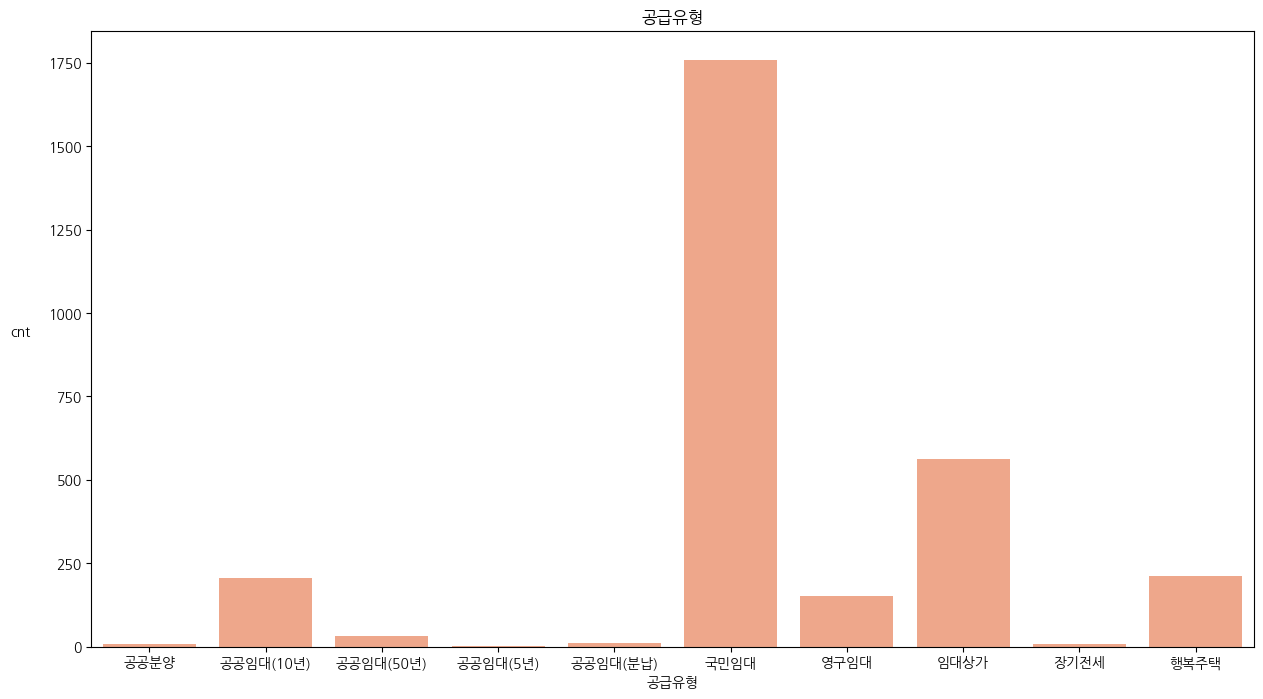

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='공급유형', color = '#ffa07a')
plt.ylabel("cnt",rotation=0,labelpad=20)
plt.title("공급유형")
plt.show()

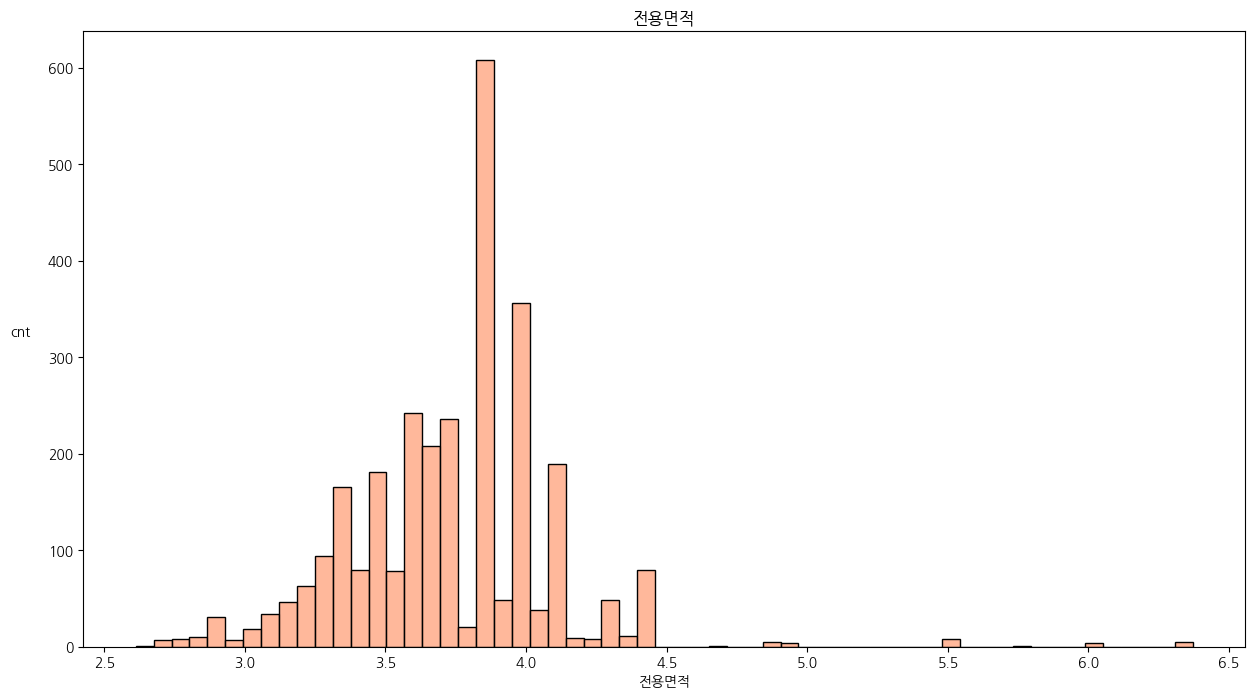

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(np.log1p(df['전용면적']), color = '#ffa07a')
plt.ylabel("cnt",rotation=0,labelpad=20)
plt.title("전용면적")
plt.show()

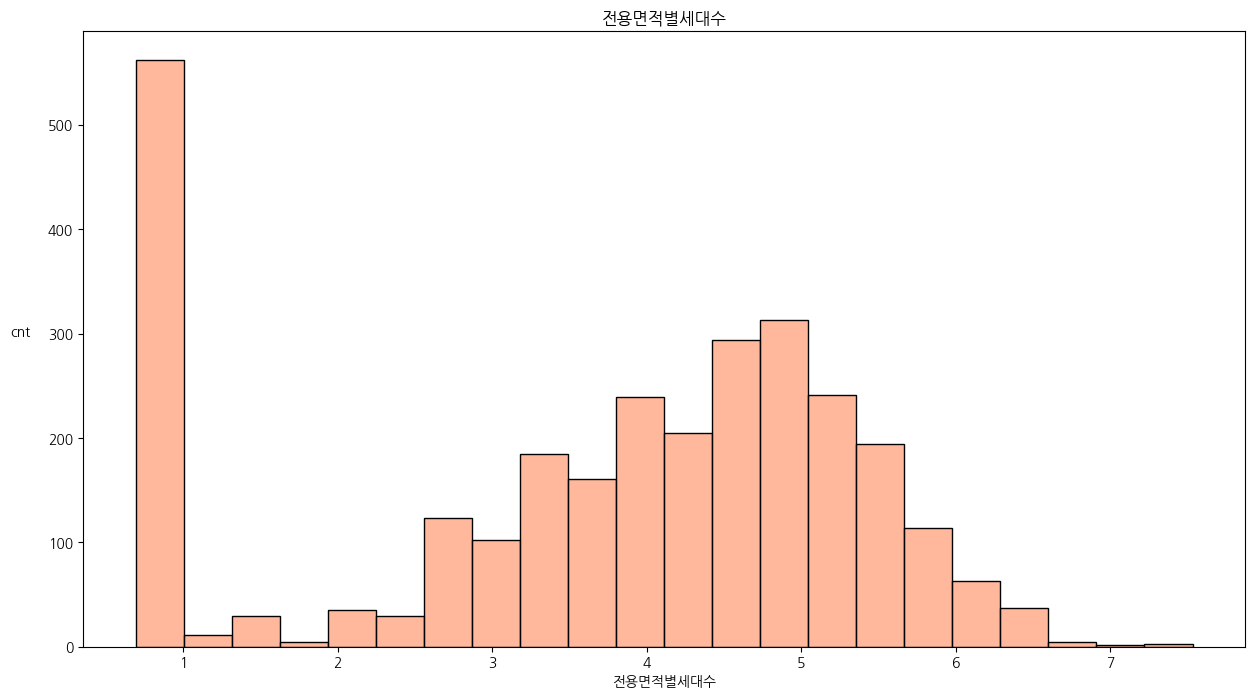

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(np.log1p(df['전용면적별세대수']), color = '#ffa07a')
plt.ylabel("cnt",rotation=0,labelpad=20)
plt.title("전용면적별세대수")
plt.show()

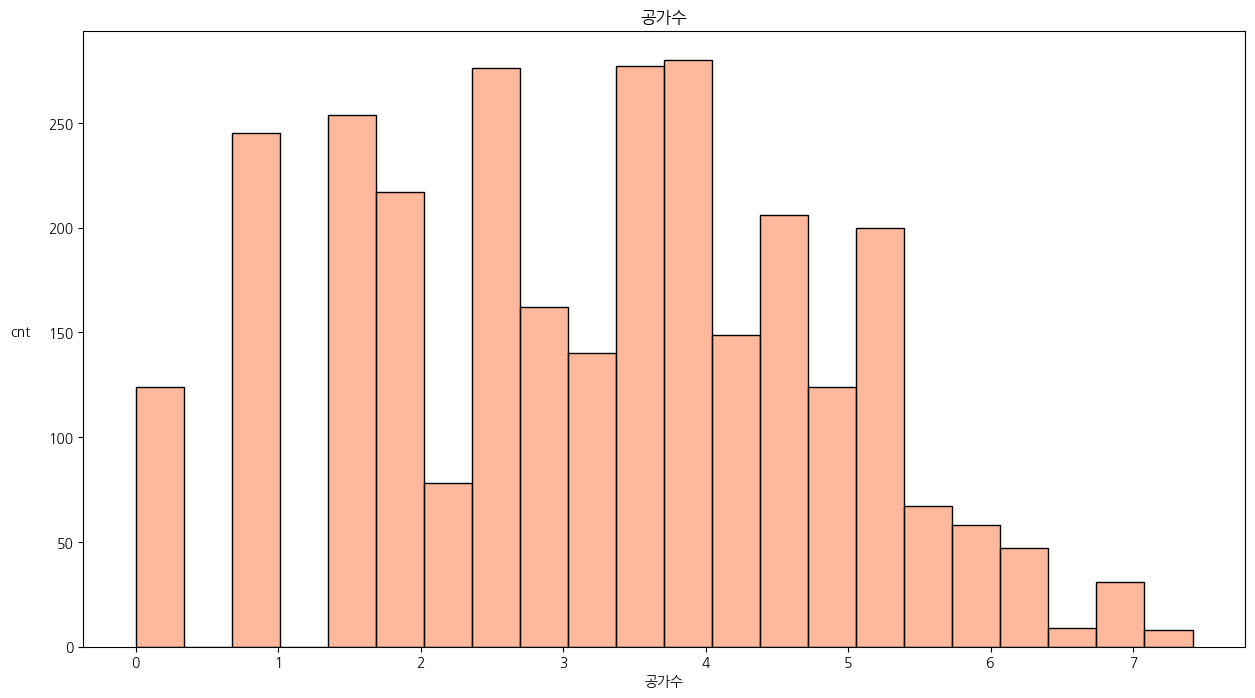

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(np.sqrt((df['공가수'])), color = '#ffa07a')
plt.ylabel("cnt",rotation=0,labelpad=20)
plt.title("공가수")
plt.show()

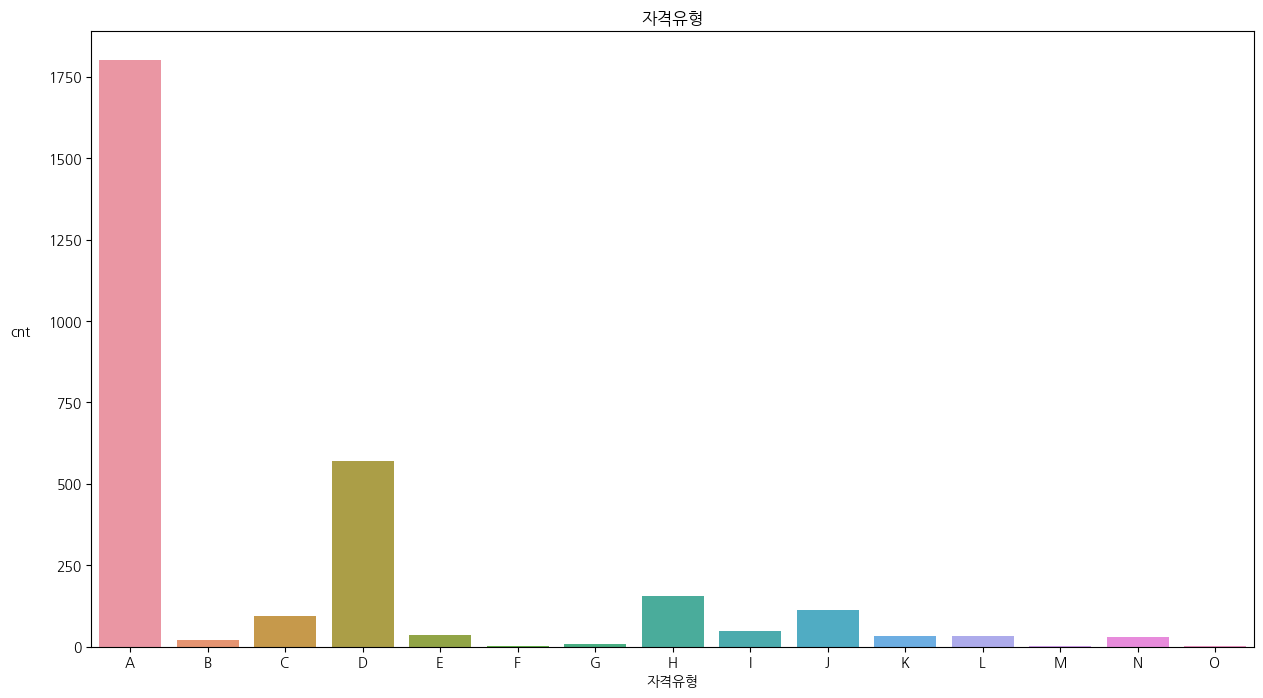

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='자격유형')
plt.ylabel("cnt",rotation=0,labelpad=20)
plt.title("자격유형")
plt.show()

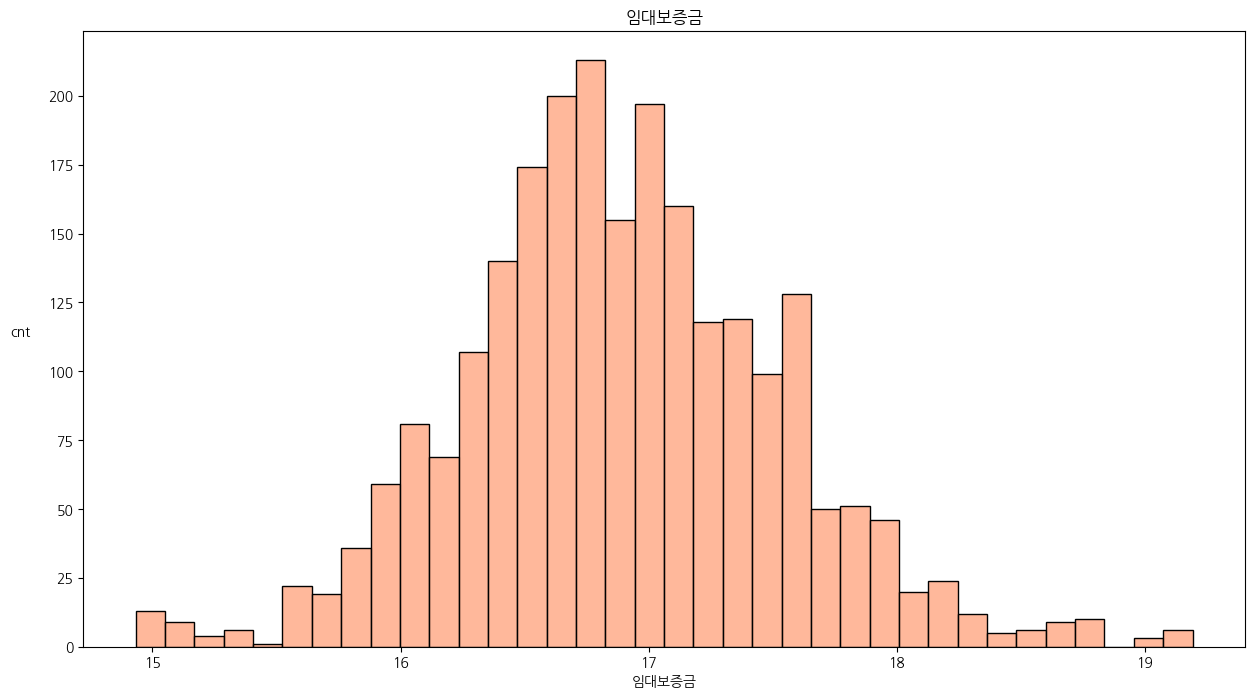

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(np.log(df['임대보증금']), color = '#ffa07a')
plt.ylabel("cnt",rotation=0,labelpad=20)
plt.title("임대보증금")
plt.show()

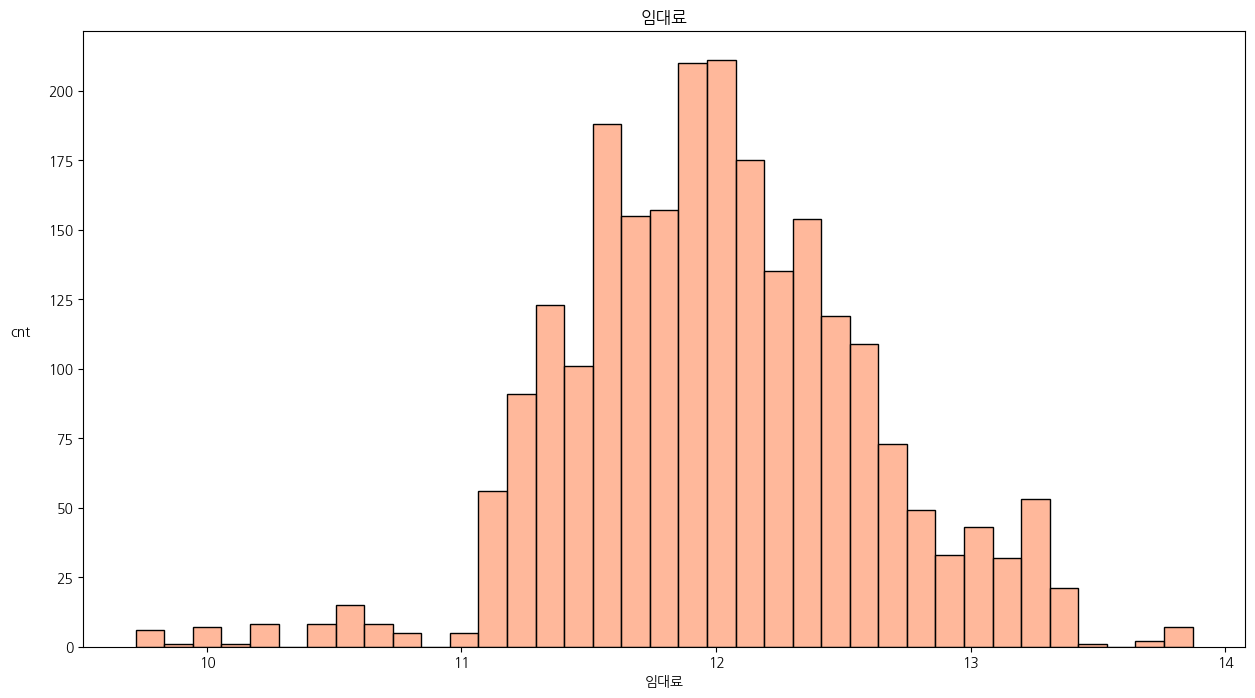

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(np.log(df['임대료']), color = '#ffa07a')
plt.ylabel("cnt",rotation=0,labelpad=20)
plt.title("임대료")
plt.show()

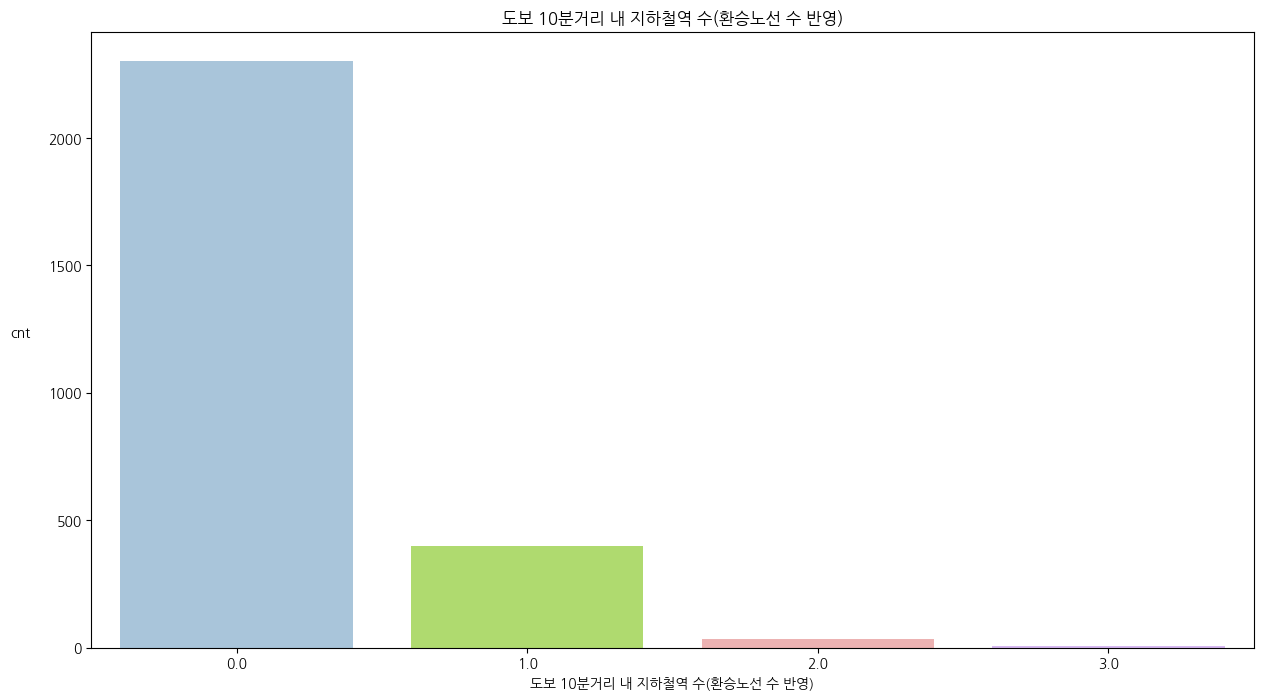

In [ ]:
plt.figure(figsize=(15, 8))
custom_palette = ["#a1c6e2", "#b2ec5d","#f5a9a9", "#d7aefb"]
sns.countplot(data=df, x='도보 10분거리 내 지하철역 수(환승노선 수 반영)',palette=custom_palette)
plt.ylabel("cnt",rotation=0,labelpad=20)
plt.title("도보 10분거리 내 지하철역 수(환승노선 수 반영)")
plt.show()

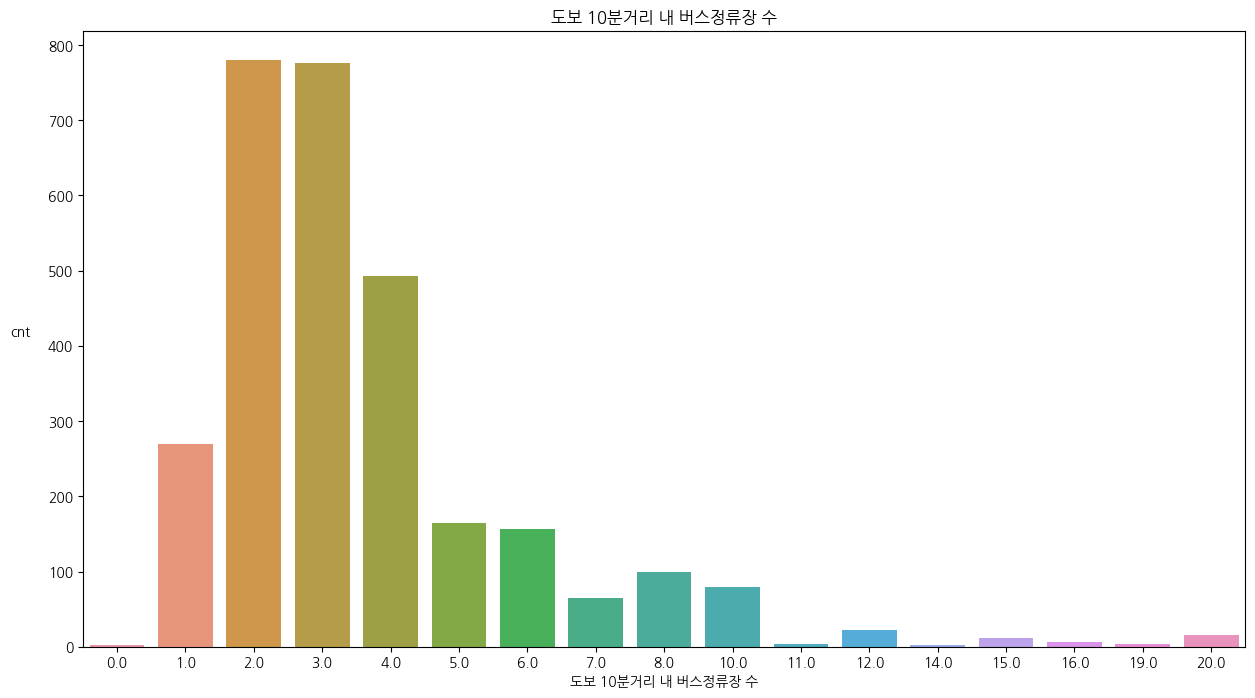

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='도보 10분거리 내 버스정류장 수')
plt.ylabel("cnt",rotation=0,labelpad=20)
plt.title("도보 10분거리 내 버스정류장 수")
plt.show()

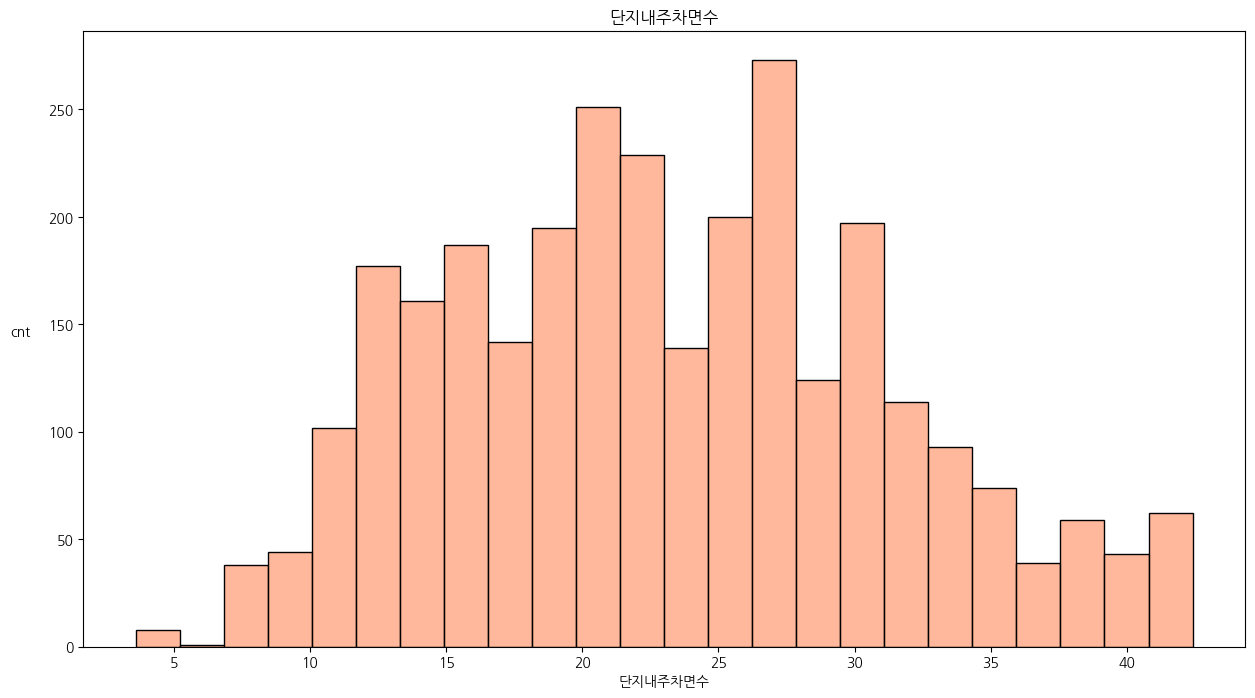

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(np.sqrt(df['단지내주차면수']), color = '#ffa07a')
plt.ylabel("cnt",rotation=0,labelpad=20)
plt.title("단지내주차면수")
plt.show()

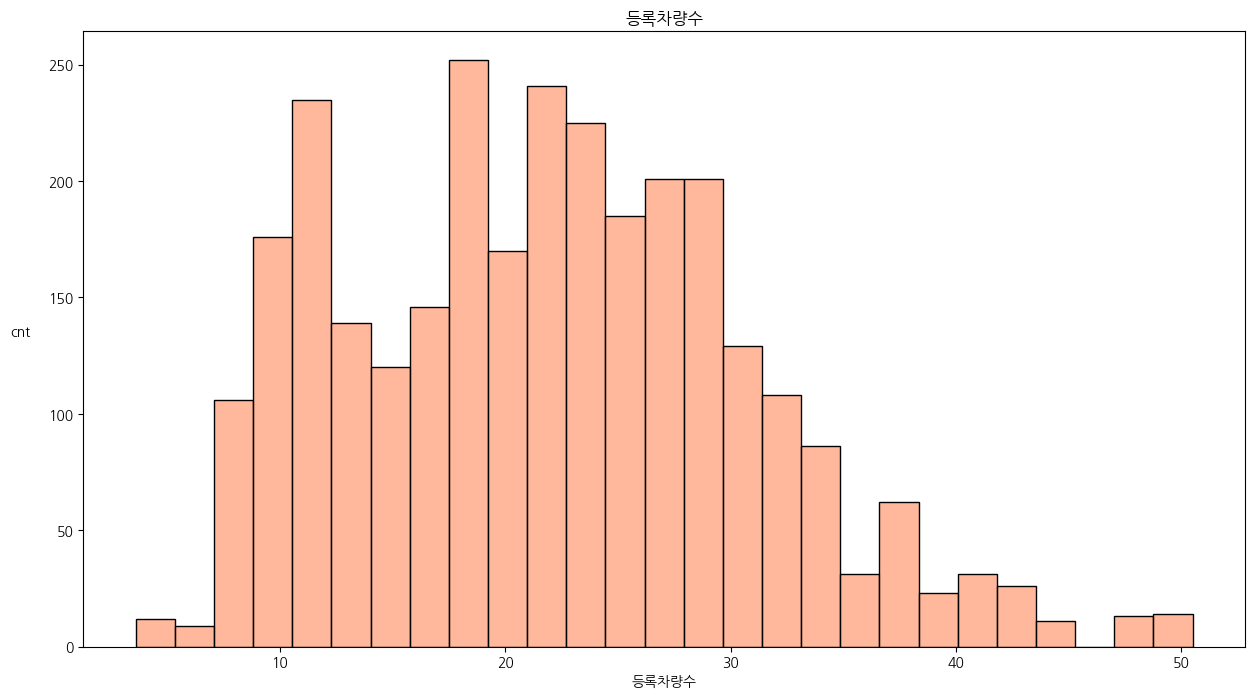

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(np.sqrt(df['등록차량수']), color = '#ffa07a')
plt.ylabel("cnt",rotation=0,labelpad=20)
plt.title("등록차량수")
plt.show()

In [ ]:
file_path = "https://raw.githubusercontent.com/rich-hyun/jae/main/age_gender_info.csv"

In [ ]:
data = pd.read_csv(file_path)
print(data.head())

      지역  10대미만(여자)  10대미만(남자)   10대(여자)   10대(남자)   20대(여자)   20대(남자)  \
0   경상북도   0.030158   0.033195  0.056346  0.061360  0.060096  0.067859   
1   경상남도   0.027400   0.026902  0.053257  0.055568  0.064920  0.070618   
2  대전광역시   0.028197   0.029092  0.040490  0.042793  0.060834  0.064247   
3    경기도   0.038030   0.039507  0.052546  0.053990  0.058484  0.059894   
4   전라북도   0.028089   0.029065  0.059685  0.060080  0.066262  0.070322   

    30대(여자)   30대(남자)   40대(여자)  ...   60대(여자)   60대(남자)   70대(여자)   70대(남자)  \
0  0.053433  0.049572  0.083660  ...  0.082684  0.063889  0.047717  0.030172   
1  0.056414  0.057550  0.077092  ...  0.087201  0.069562  0.048357  0.033277   
2  0.068654  0.066848  0.074667  ...  0.088468  0.070261  0.051010  0.037143   
3  0.072331  0.068704  0.083208  ...  0.074237  0.058419  0.042422  0.032725   
4  0.052027  0.046596  0.077005  ...  0.076636  0.068042  0.051025  0.035748   

    80대(여자)   80대(남자)   90대(여자)   90대(남자)  100대(여자)  100대(남자)  
0  0.02936

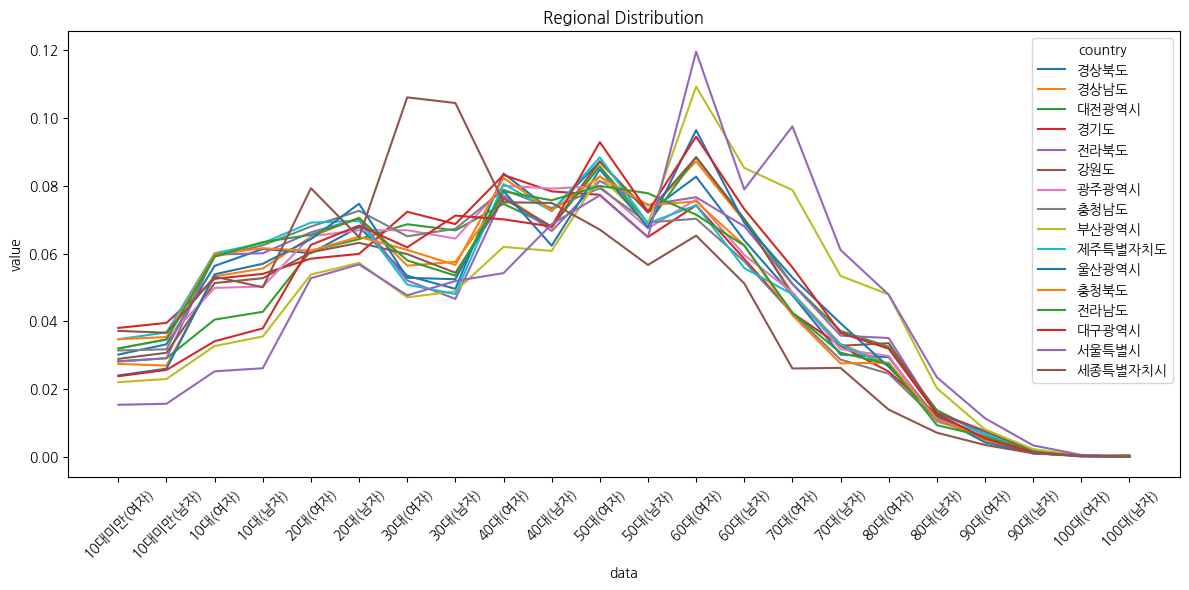

In [ ]:
plt.figure(figsize=(12, 6))
for index, row in data.iterrows():
    region = row[0]
    data_values = row[1:]  # 첫 번째 열을 제외한 나머지 열은 데이터
    plt.plot(data.columns[1:], data_values, label=region)

plt.xlabel('data')
plt.ylabel('value')
plt.title('Regional Distribution')
plt.legend(loc='upper right', title='country')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()

#3. 기본적인 데이터 전처리

적절한 변수 변환

In [ ]:
df_transform= df

In [ ]:
df_transform['총세대수']= np.log1p(df['총세대수'])
df_transform['전용면적']= np.log1p(df['전용면적'])
df_transform['전용면적별세대수']= np.log1p(df['전용면적별세대수'])
df_transform['공가수']= np.sqrt((df['공가수']))
df_transform['임대보증금']= np.log1p(df['임대보증금'])
df_transform['임대료']= np.log1p(df['임대료'])
df_transform['단지내주차면수']= np.sqrt(df['단지내주차면수'])
df_transform['등록차량수']= np.sqrt(df['등록차량수'])

In [ ]:
df_transform

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,6.803505,아파트,경상북도,국민임대,3.706719,4.905275,6.164414,A,16.567067,11.549074,0.0,3.0,37.749172,31.859065
1,C2483,6.803505,아파트,경상북도,국민임대,3.706719,2.772589,6.164414,A,16.567067,11.549074,0.0,3.0,37.749172,31.859065
2,C2483,6.803505,아파트,경상북도,국민임대,3.968970,5.955837,6.164414,A,17.122544,12.124488,0.0,3.0,37.749172,31.859065
3,C2483,6.803505,아파트,경상북도,국민임대,3.968970,2.772589,6.164414,A,17.122544,12.124488,0.0,3.0,37.749172,31.859065
4,C2483,6.803505,아파트,경상북도,국민임대,3.968970,3.737670,6.164414,A,17.122544,12.124488,0.0,3.0,37.749172,31.859065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,5.480639,아파트,강원도,국민임대,3.916015,2.995732,2.645751,A,16.244376,11.662130,0.0,1.0,12.884099,12.083046
2948,C2532,5.480639,아파트,강원도,국민임대,3.952781,3.555348,2.645751,A,16.454925,11.865770,0.0,1.0,12.884099,12.083046
2949,C2532,5.480639,아파트,강원도,국민임대,3.965185,3.555348,2.645751,A,16.454925,11.865770,0.0,1.0,12.884099,12.083046
2950,C2532,5.480639,아파트,강원도,국민임대,3.969537,4.744932,2.645751,A,16.454925,11.865770,0.0,1.0,12.884099,12.083046


In [ ]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   단지코드                          2952 non-null   object  
 1   총세대수                          2952 non-null   float64 
 2   임대건물구분                        2952 non-null   category
 3   지역                            2952 non-null   category
 4   공급유형                          2952 non-null   category
 5   전용면적                          2952 non-null   float64 
 6   전용면적별세대수                      2952 non-null   float64 
 7   공가수                           2952 non-null   float64 
 8   자격유형                          2952 non-null   category
 9   임대보증금                         2371 non-null   float64 
 10  임대료                           2362 non-null   float64 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   category
 12  도보 10분거리 내 버스정류장 수            2948 non-null   ca

X와 Y의 관계 시각화

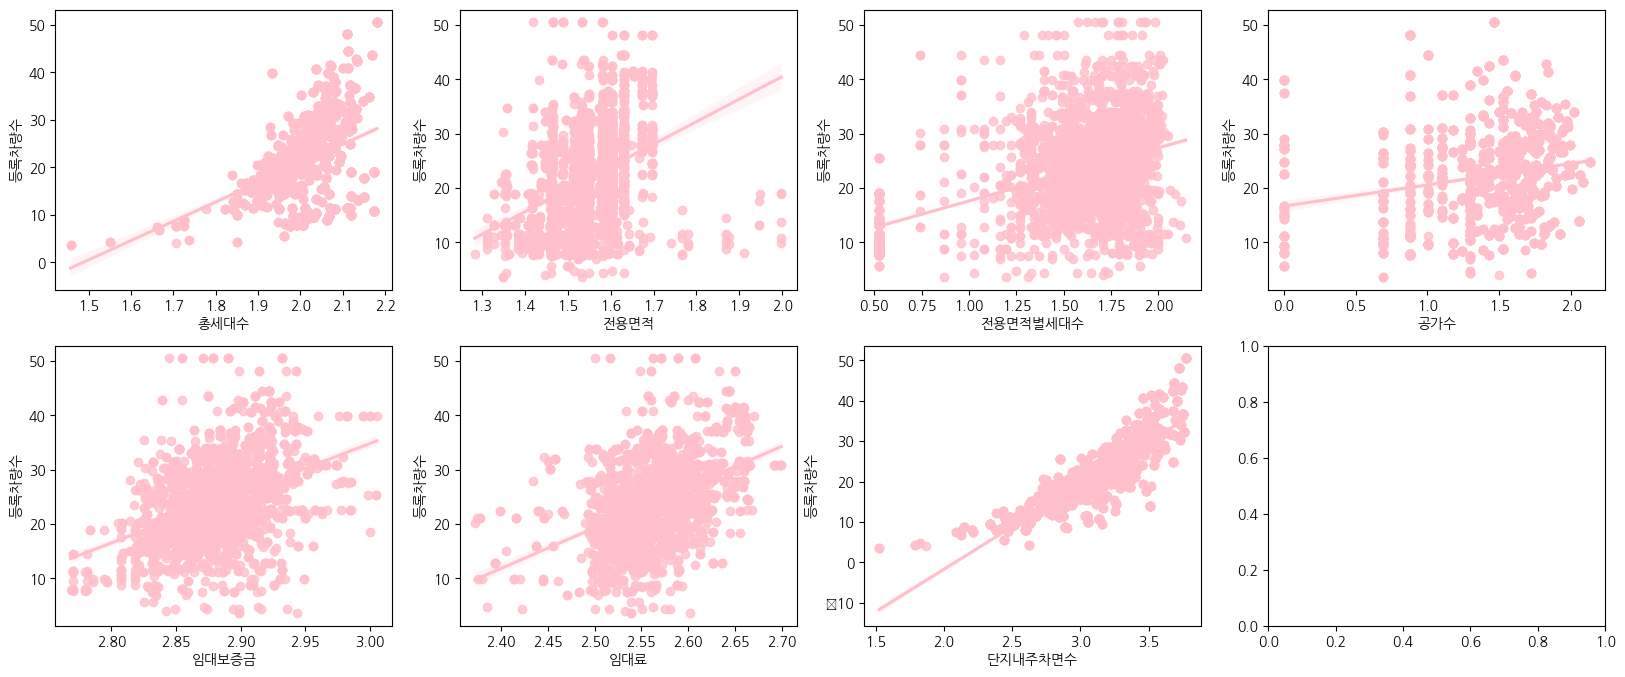

In [ ]:
fig, axs = plt.subplots(figsize=(20, 8), ncols=4, nrows=2)

lm_features = df_transform[['총세대수',	'전용면적',	'전용면적별세대수',	'공가수',	'임대보증금',	'임대료',	'단지내주차면수']]
label= df_transform['등록차량수']

for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    sns.regplot(x=np.log1p(df[feature]), y= label, data=df, ax=axs[row][col], color = 'pink')

In [ ]:
data = pd.concat([lm_features, label], axis=1)

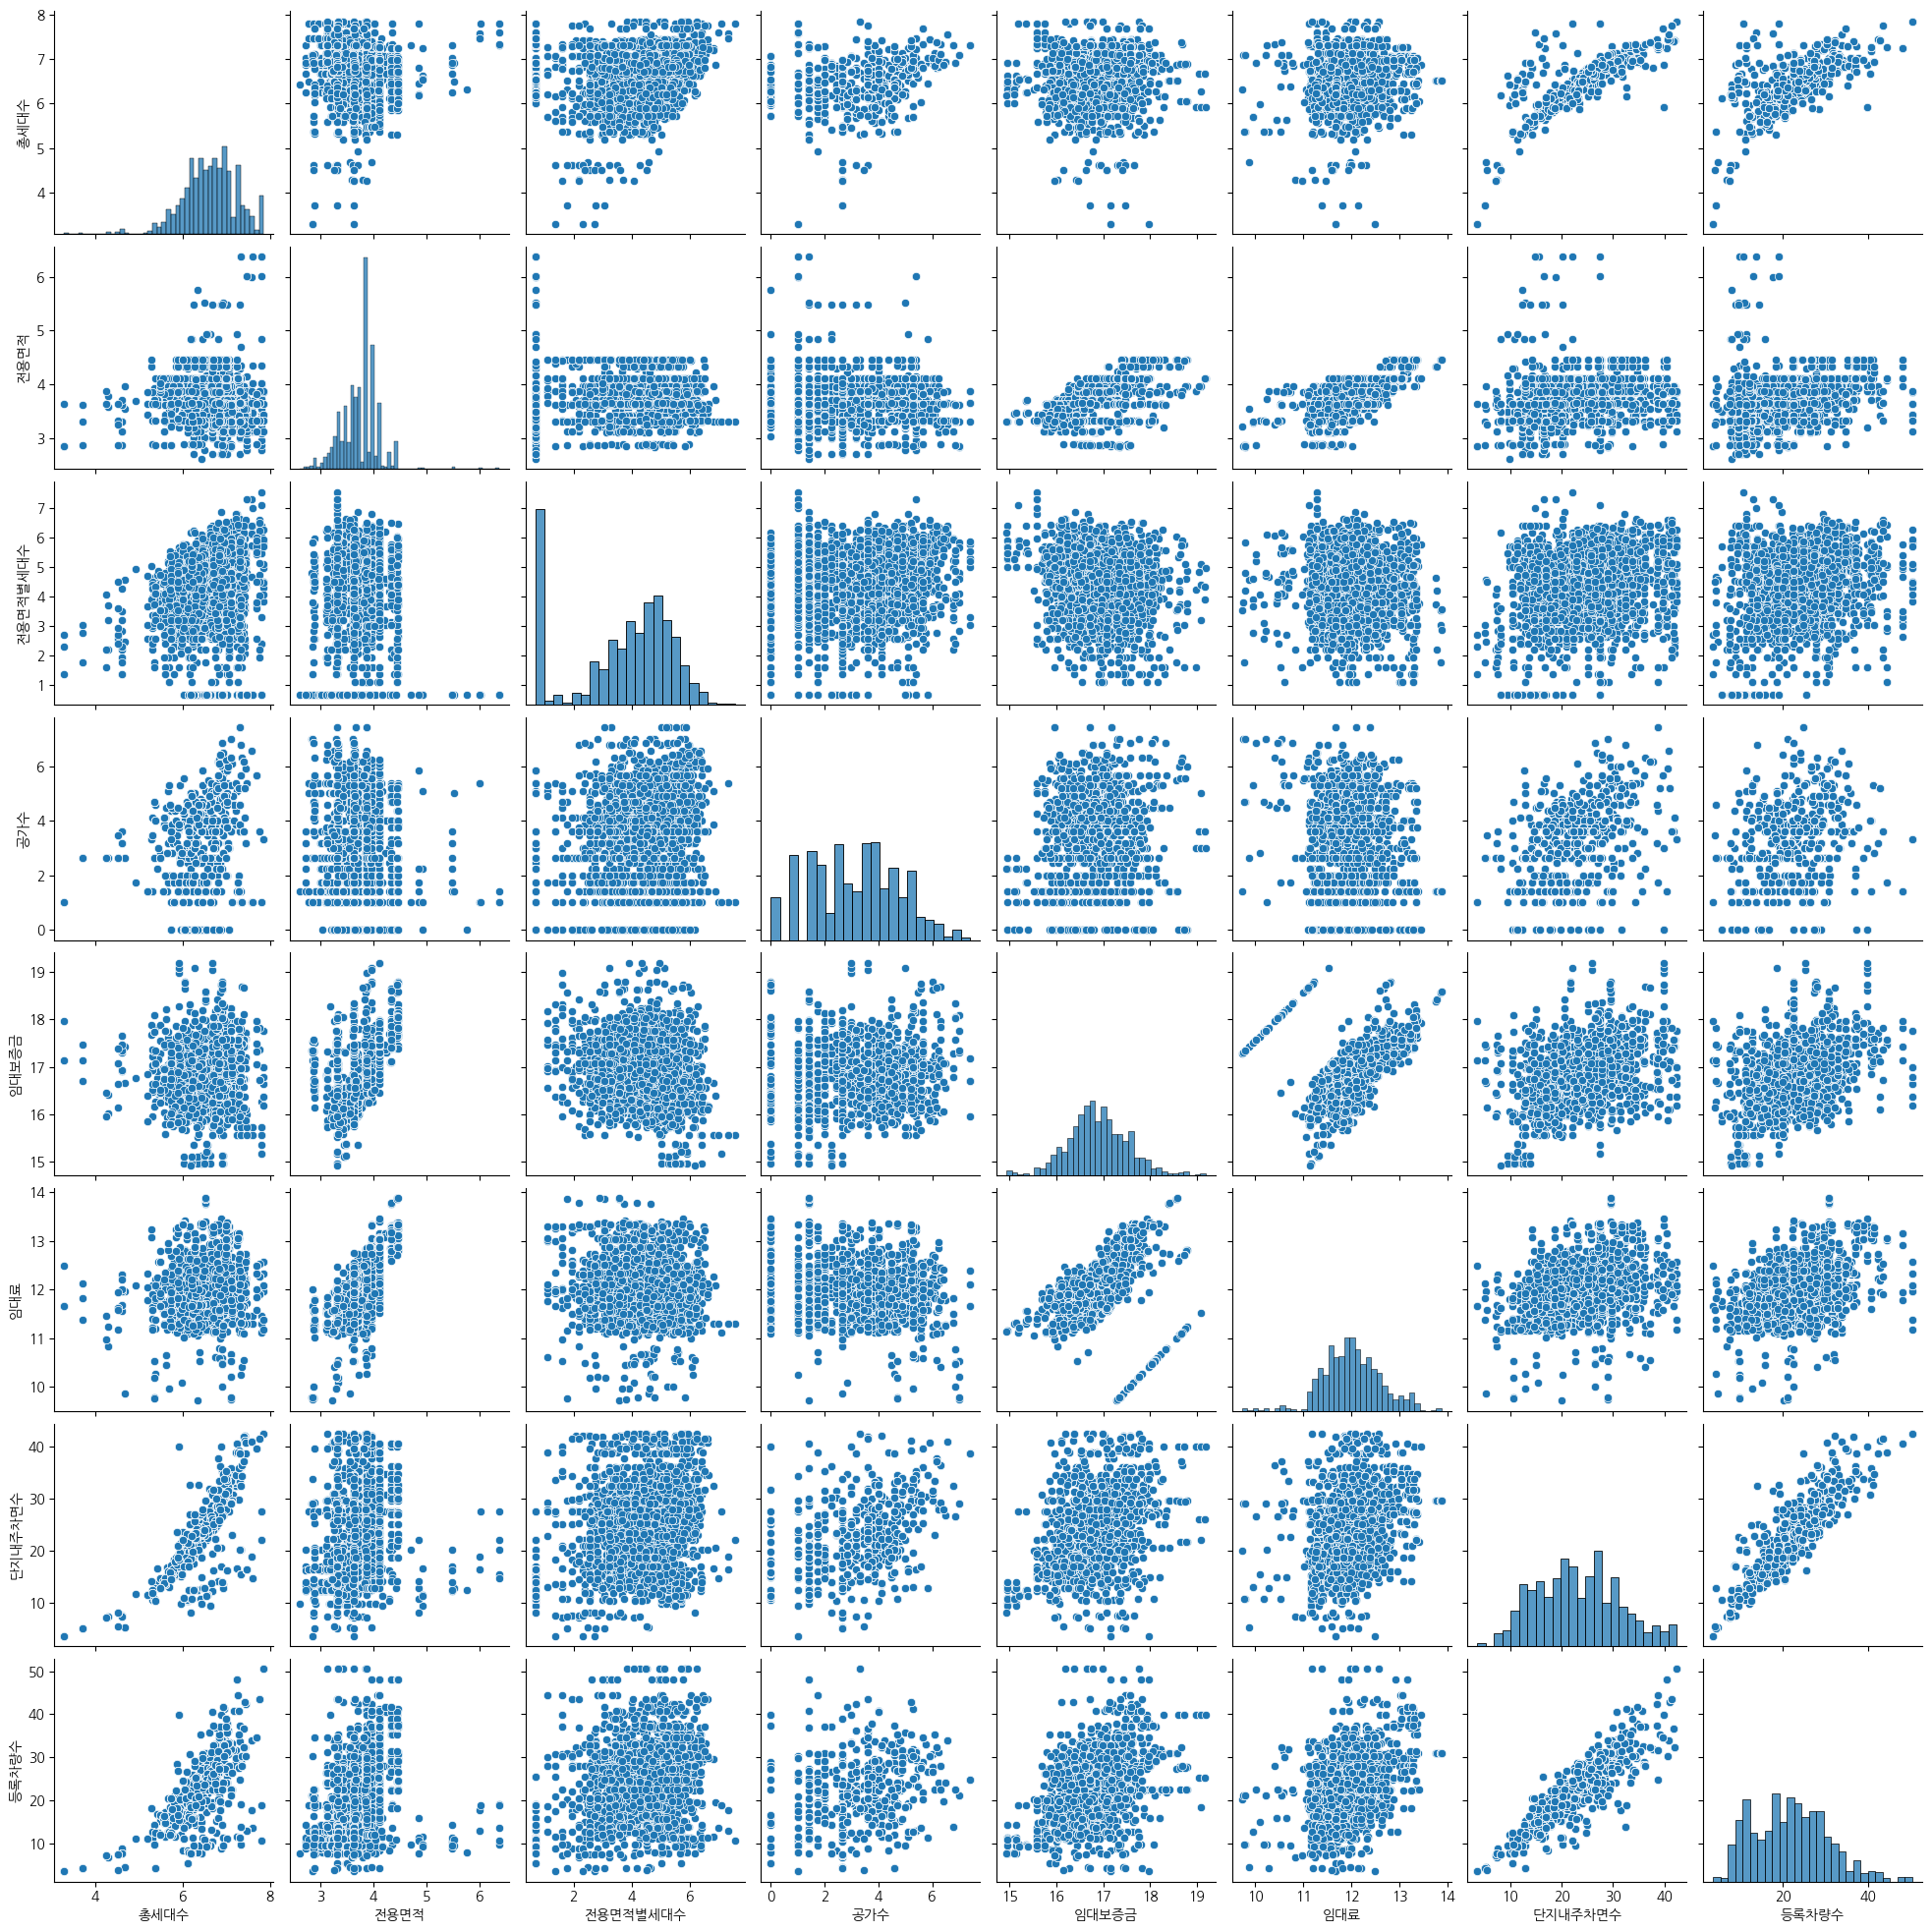

In [ ]:
sns.pairplot(data)
plt.show()

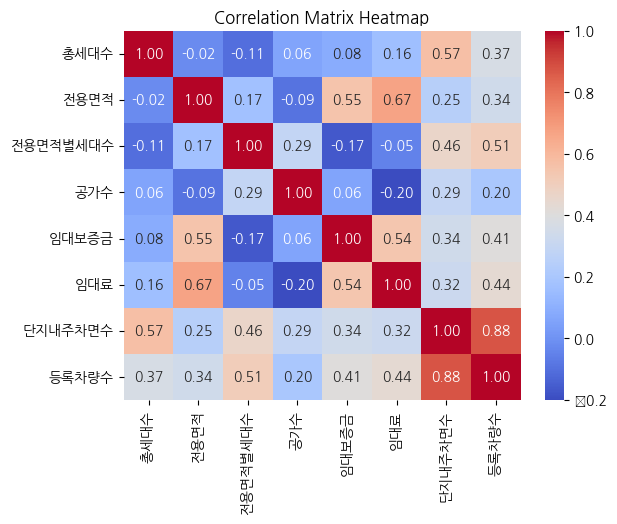

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

#4. 여러가지 모델들의 초기 결과값

In [ ]:
train_data = 'https://raw.githubusercontent.com/rich-hyun/jae/main/train.csv'

df = pd.read_csv(train_data)

df = df.replace('-', float('nan'))
imputer = SimpleImputer(strategy='mean')
df['임대보증금'] = imputer.fit_transform(df['임대보증금'].values.reshape(-1, 1))
df['임대료'] = imputer.fit_transform(df['임대료'].values.reshape(-1, 1))

X = df[['임대건물구분', '지역', '공급유형', '전용면적', '공가수', '자격유형', '임대보증금', '임대료',
        '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수']]
y = df['등록차량수']

X = pd.get_dummies(X, columns=['임대건물구분', '지역', '공급유형', '자격유형'], drop_first=True)

학습용과 테스트용 데이터로 나누기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

HistGradientBoostingRegressor 모델

In [ ]:
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

Mean Squared Error: 2496.051075189887
R-squared: 0.986607591020309
MAE: 32.41449209203099


In [ ]:
X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 33.621421017540655


부스트

In [ ]:
train_data = 'https://raw.githubusercontent.com/rich-hyun/jae/main/train.csv'

df = pd.read_csv(train_data)

df = df.replace('-', float('nan'))
imputer = SimpleImputer(strategy='mean')
df['임대보증금'] = imputer.fit_transform(df['임대보증금'].values.reshape(-1, 1))
df['임대료'] = imputer.fit_transform(df['임대료'].values.reshape(-1, 1))

X = df[['임대건물구분', '지역', '공급유형', '전용면적', '공가수', '자격유형', '임대보증금', '임대료',
        '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수']]
y = df['등록차량수']

X = pd.get_dummies(X, columns=['임대건물구분', '지역', '공급유형', '자격유형'], drop_first=True)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingRegressor(random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae = mean_absolute_error(y_test, y_pred_gb)
print("Gradient Boosting:")
print(f'Mean Squared Error: {mse_gb}')
print(f'R-squared: {r2_gb}')
print("MAE:", mae)

ada_model = AdaBoostRegressor(random_state=42)

ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_test)

mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
mae = mean_absolute_error(y_test, y_pred_ada)
print("AdaBoost:")
print(f'Mean Squared Error: {mse_ada}')
print(f'R-squared: {r2_ada}')
print("MAE:", mae)


Gradient Boosting:
Mean Squared Error: 10746.032968519829
R-squared: 0.942342819081652
MAE: 76.56099371236499
AdaBoost:
Mean Squared Error: 33031.20798635145
R-squared: 0.8227730791074453
MAE: 150.83808971992562


여러가지 회귀 모델 시도 - 선형회귀, 랜덤포레스트

In [ ]:
train_data = 'https://raw.githubusercontent.com/rich-hyun/jae/main/train.csv'

df = pd.read_csv(train_data)

df = df.replace('-', float('nan'))
imputer = SimpleImputer(strategy='mean')
df['임대보증금'] = imputer.fit_transform(df['임대보증금'].values.reshape(-1, 1))
df['임대료'] = imputer.fit_transform(df['임대료'].values.reshape(-1, 1))

X = df[['임대건물구분', '지역', '공급유형', '전용면적', '공가수', '자격유형', '임대보증금', '임대료',
        '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수']]
y = df['등록차량수']

X = pd.get_dummies(X, columns=['임대건물구분', '지역', '공급유형', '자격유형'], drop_first=True)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [ ]:
models = [LinearRegression(), RandomForestRegressor(), SVR(), KNeighborsRegressor()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model.__class__.__name__}: MAE = {mae}")

LinearRegression: MAE = 131.21997896525343
RandomForestRegressor: MAE = 17.070541455160747
SVR: MAE = 314.4468874445298
KNeighborsRegressor: MAE = 183.9346869712352


#5. 다중대치법으로 NA 대치

In [ ]:
df_transform= df_transform.drop('단지코드', axis=1)

In [ ]:

onehot_임대건물구분 = pd.get_dummies(df_transform['임대건물구분'], prefix='임대건물')
onehot_지역 = pd.get_dummies(df_transform['지역'], prefix= '지역')
onehot_공급유형 = pd.get_dummies(df_transform['공급유형'], prefix= '공급유형')
onehot_자격유형 = pd.get_dummies(df_transform['자격유형'], prefix= '자격유형')
onehot_도보_10분거리_내_지하철역_수_환승노선_수_반영 = pd.get_dummies(df_transform['도보 10분거리 내 지하철역 수(환승노선 수 반영)'], prefix= '지하철역 수')
onehot_도보_10분거리_내_버스정류장_수 = pd.get_dummies(df_transform['도보 10분거리 내 버스정류장 수'], prefix= '버스정류장 수')

df_transform = pd.concat([df_transform, onehot_임대건물구분, onehot_지역, onehot_공급유형, onehot_자격유형, onehot_도보_10분거리_내_지하철역_수_환승노선_수_반영, onehot_도보_10분거리_내_버스정류장_수], axis=1)

print(df_transform.head())

       총세대수 임대건물구분    지역  공급유형      전용면적  전용면적별세대수       공가수 자격유형      임대보증금  \
0  6.803505    아파트  경상북도  국민임대  3.706719  4.905275  6.164414    A  16.567067   
1  6.803505    아파트  경상북도  국민임대  3.706719  2.772589  6.164414    A  16.567067   
2  6.803505    아파트  경상북도  국민임대  3.968970  5.955837  6.164414    A  17.122544   
3  6.803505    아파트  경상북도  국민임대  3.968970  2.772589  6.164414    A  17.122544   
4  6.803505    아파트  경상북도  국민임대  3.968970  3.737670  6.164414    A  17.122544   

         임대료  ... 버스정류장 수_7.0 버스정류장 수_8.0  버스정류장 수_10.0  버스정류장 수_11.0  \
0  11.549074  ...           0           0             0             0   
1  11.549074  ...           0           0             0             0   
2  12.124488  ...           0           0             0             0   
3  12.124488  ...           0           0             0             0   
4  12.124488  ...           0           0             0             0   

   버스정류장 수_12.0  버스정류장 수_14.0  버스정류장 수_15.0  버스정류장 수_16.0  버스정류장 수_19.0  \
0    

In [ ]:
df_transform= df_transform.drop(['임대건물구분', '지역', '공급유형', '자격유형', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수'], axis=1)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imputer = IterativeImputer(max_iter=20, random_state=0)

imputed_data = imputer.fit_transform(df_transform)

imputed_df = pd.DataFrame(imputed_data, columns=df_transform.columns)

In [ ]:
imputed_df.columns

Index(['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '단지내주차면수', '등록차량수',
       '임대건물_상가', '임대건물_아파트', '지역_강원도', '지역_경기도', '지역_경상남도', '지역_경상북도',
       '지역_광주광역시', '지역_대구광역시', '지역_대전광역시', '지역_부산광역시', '지역_서울특별시',
       '지역_세종특별자치시', '지역_울산광역시', '지역_전라남도', '지역_전라북도', '지역_제주특별자치도', '지역_충청남도',
       '지역_충청북도', '공급유형_공공분양', '공급유형_공공임대(10년)', '공급유형_공공임대(50년)',
       '공급유형_공공임대(5년)', '공급유형_공공임대(분납)', '공급유형_국민임대', '공급유형_영구임대', '공급유형_임대상가',
       '공급유형_장기전세', '공급유형_행복주택', '자격유형_A', '자격유형_B', '자격유형_C', '자격유형_D',
       '자격유형_E', '자격유형_F', '자격유형_G', '자격유형_H', '자격유형_I', '자격유형_J', '자격유형_K',
       '자격유형_L', '자격유형_M', '자격유형_N', '자격유형_O', '지하철역 수_0.0', '지하철역 수_1.0',
       '지하철역 수_2.0', '지하철역 수_3.0', '버스정류장 수_0.0', '버스정류장 수_1.0', '버스정류장 수_2.0',
       '버스정류장 수_3.0', '버스정류장 수_4.0', '버스정류장 수_5.0', '버스정류장 수_6.0',
       '버스정류장 수_7.0', '버스정류장 수_8.0', '버스정류장 수_10.0', '버스정류장 수_11.0',
       '버스정류장 수_12.0', '버스정류장 수_14.0', '버스정류장 수_15.0', '버스정류장 수_16.0',
       '버스정류장 수_19.0', '버스정류장 수_20.0'],
    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
feature=imputed_df[['총세대수', '전용면적별세대수', '임대료', '단지내주차면수',
       '임대건물_아파트', '지역_경기도', '지역_경상남도', '지역_경상북도',
       '지역_광주광역시', '지역_대구광역시', '지역_대전광역시', '지역_부산광역시',
       '지역_세종특별자치시', '지역_울산광역시', '지역_전라남도', '지역_전라북도', '지역_제주특별자치도', '지역_충청남도',
       '지역_충청북도', '자격유형_C', '자격유형_D',
       '자격유형_E', '자격유형_G', '자격유형_H', '자격유형_I', '자격유형_J', '자격유형_K',
       '자격유형_L', '자격유형_M', '자격유형_N', '지하철역 수_1.0',
       '지하철역 수_2.0', '버스정류장 수_1.0', '버스정류장 수_2.0',
       '버스정류장 수_3.0', '버스정류장 수_4.0', '버스정류장 수_5.0', '버스정류장 수_6.0',
       '버스정류장 수_7.0', '버스정류장 수_8.0', '버스정류장 수_10.0', '버스정류장 수_11.0',
       '버스정류장 수_12.0', '버스정류장 수_14.0', '버스정류장 수_15.0', '버스정류장 수_16.0'
       ]]
label= imputed_df['등록차량수']

In [ ]:
x_train, x_val, y_train, y_val= train_test_split(feature, label, test_size=0.2, random_state= 42)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2361 entries, 2860 to 860
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   총세대수        2361 non-null   float64
 1   전용면적별세대수    2361 non-null   float64
 2   임대료         2361 non-null   float64
 3   단지내주차면수     2361 non-null   float64
 4   임대건물_아파트    2361 non-null   float64
 5   지역_경기도      2361 non-null   float64
 6   지역_경상남도     2361 non-null   float64
 7   지역_경상북도     2361 non-null   float64
 8   지역_광주광역시    2361 non-null   float64
 9   지역_대구광역시    2361 non-null   float64
 10  지역_대전광역시    2361 non-null   float64
 11  지역_부산광역시    2361 non-null   float64
 12  지역_세종특별자치시  2361 non-null   float64
 13  지역_울산광역시    2361 non-null   float64
 14  지역_전라남도     2361 non-null   float64
 15  지역_전라북도     2361 non-null   float64
 16  지역_제주특별자치도  2361 non-null   float64
 17  지역_충청남도     2361 non-null   float64
 18  지역_충청북도     2361 non-null   float64
 19  자격유형_C      2361 non-null

#6. 릿지와 다른 모델들의 결과

In [ ]:
import statsmodels.api as sm
from scipy.stats import shapiro


In [ ]:
ridge= Ridge(alpha= 0.01, solver = "cholesky")


In [ ]:
ridge.fit(x_train, y_train)

Ridge(alpha=0.01, solver='cholesky')

In [ ]:
y_pred = ridge.predict(x_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

# 결과 출력
print("Mean Absolute Error (MAE):", mae)
print("평균 제곱근 오차 (RMSE):", rmse)
print("R-squared (결정 계수):", r2)

Mean Absolute Error (MAE): 2.6622031617282906
평균 제곱근 오차 (RMSE): 3.405122602651313
R-squared (결정 계수): 0.8500310673777973


In [ ]:
residuals = y_val - y_pred

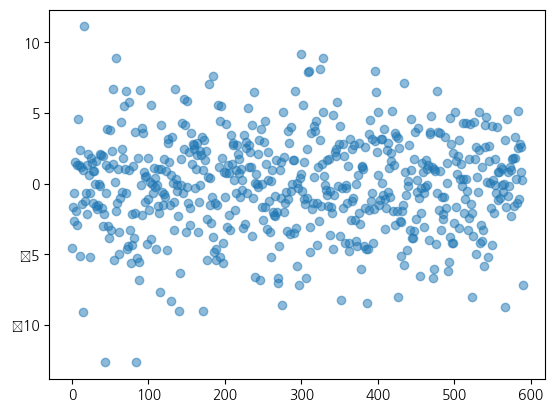

In [ ]:
plt.scatter(range(len(residuals)), residuals, alpha=0.5)

In [ ]:
residuals = y_val - y_pred
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

dw_statistic = sm.stats.stattools.durbin_watson(standardized_residuals)
print(f"더빈-왓슨 통계량: {dw_statistic}")

statistic, p_value = shapiro(standardized_residuals)
print(f"Shapiro-Wilk 검정 통계량: {statistic}")
print(f"p-value: {p_value}")
alpha = 0.05
if p_value > alpha:
    print("데이터는 정규 분포를 따릅니다 (귀무가설을 기각할 수 없음)")
else:
    print("데이터는 정규 분포를 따르지 않습니다 (귀무가설을 기각)")

더빈-왓슨 통계량: 2.0126451666998033
Shapiro-Wilk 검정 통계량: 0.9952343702316284
p-value: 0.06571418792009354
데이터는 정규 분포를 따릅니다 (귀무가설을 기각할 수 없음)


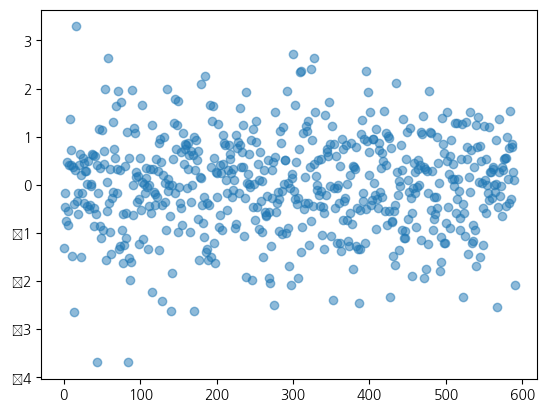

In [ ]:
plt.scatter(range(len(residuals)), standardized_residuals, alpha=0.5)

릿지 외 다른 모델

In [ ]:
models = [LinearRegression(), RandomForestRegressor(), SVR(), KNeighborsRegressor()]

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    mae = mean_absolute_error(y_val, y_pred)
    print(f"{model.__class__.__name__}: MAE = {mae}")

LinearRegression: MAE = 2.662199131748946
RandomForestRegressor: MAE = 0.38312004888645046
SVR: MAE = 2.894974172503406
KNeighborsRegressor: MAE = 1.0933176444460369


In [ ]:
model= KNeighborsRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("평균 제곱근 오차 (RMSE):", rmse)
print("R-squared (결정 계수):", r2)

mae = mean_absolute_error(y_val, y_pred)
print("MAE:", mae)
residuals = y_val - y_pred
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

dw_statistic = sm.stats.stattools.durbin_watson(standardized_residuals)
print(f"더빈-왓슨 통계량: {dw_statistic}")

statistic, p_value = shapiro(standardized_residuals)
print(f"Shapiro-Wilk 검정 통계량: {statistic}")
print(f"p-value: {p_value}")
alpha = 0.05
if p_value > alpha:
    print("데이터는 정규 분포를 따릅니다 (귀무가설을 기각할 수 없음)")
else:
    print("데이터는 정규 분포를 따르지 않습니다 (귀무가설을 기각)")

평균 제곱근 오차 (RMSE): 1.9321548641865498
R-squared (결정 계수): 0.9517141746955199
MAE: 1.0933176444460369
더빈-왓슨 통계량: 1.9709031928850167
Shapiro-Wilk 검정 통계량: 0.850411057472229
p-value: 3.256580322098812e-23
데이터는 정규 분포를 따르지 않습니다 (귀무가설을 기각)


In [ ]:
model= SVR()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("평균 제곱근 오차 (RMSE):", rmse)
print("R-squared (결정 계수):", r2)

mae = mean_absolute_error(y_val, y_pred)
print("MAE:", mae)
residuals = y_val - y_pred
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

dw_statistic = sm.stats.stattools.durbin_watson(standardized_residuals)
print(f"더빈-왓슨 통계량: {dw_statistic}")

statistic, p_value = shapiro(standardized_residuals)
print(f"Shapiro-Wilk 검정 통계량: {statistic}")
print(f"p-value: {p_value}")
alpha = 0.05
if p_value > alpha:
    print("데이터는 정규 분포를 따릅니다 (귀무가설을 기각할 수 없음)")
else:
    print("데이터는 정규 분포를 따르지 않습니다 (귀무가설을 기각)")

평균 제곱근 오차 (RMSE): 3.979069398368436
R-squared (결정 계수): 0.7952146800871127
MAE: 2.894974172503406
더빈-왓슨 통계량: 2.0255706674349088
Shapiro-Wilk 검정 통계량: 0.9701495170593262
p-value: 1.3248928620868128e-09
데이터는 정규 분포를 따르지 않습니다 (귀무가설을 기각)


In [ ]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("평균 제곱근 오차 (RMSE):", rmse)
print("R-squared (결정 계수):", r2)

mae = mean_absolute_error(y_val, y_pred)
print("MAE:", mae)
residuals = y_val - y_pred
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

dw_statistic = sm.stats.stattools.durbin_watson(standardized_residuals)
print(f"더빈-왓슨 통계량: {dw_statistic}")

statistic, p_value = shapiro(standardized_residuals)
print(f"Shapiro-Wilk 검정 통계량: {statistic}")
print(f"p-value: {p_value}")
alpha = 0.05
if p_value > alpha:
    print("데이터는 정규 분포를 따릅니다 (귀무가설을 기각할 수 없음)")
else:
    print("데이터는 정규 분포를 따르지 않습니다 (귀무가설을 기각)")

평균 제곱근 오차 (RMSE): 0.8676175354190224
R-squared (결정 계수): 0.9902637338895934
MAE: 0.3762123766246442
더빈-왓슨 통계량: 1.9684268247405372
Shapiro-Wilk 검정 통계량: 0.6304864883422852
p-value: 1.0284761907199056e-33
데이터는 정규 분포를 따르지 않습니다 (귀무가설을 기각)


<Axes: xlabel='등록차량수', ylabel='Count'>

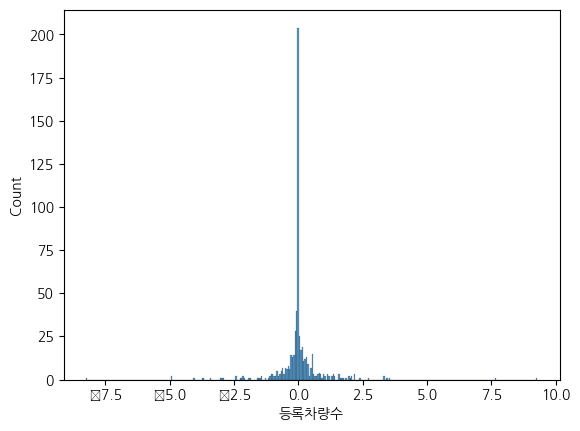

In [ ]:
sns.histplot(standardized_residuals)

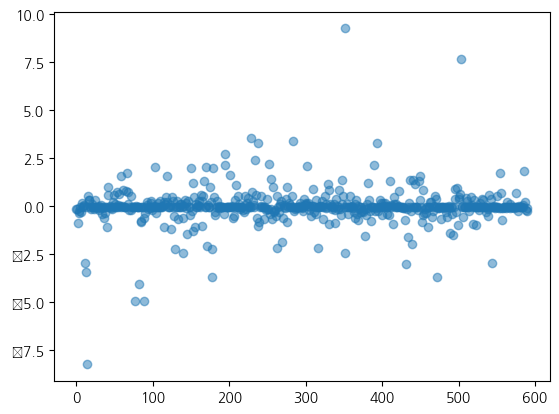

In [ ]:
plt.scatter(range(len(standardized_residuals)), standardized_residuals, alpha=0.5)

#7. 테스트세트 적용

In [ ]:
train_data = 'https://raw.githubusercontent.com/rich-hyun/jae/main/train.csv'

df = pd.read_csv(train_data)

df = df.replace('-', float('nan'))
imputer = SimpleImputer(strategy='mean')
df['임대보증금'] = imputer.fit_transform(df['임대보증금'].values.reshape(-1, 1))
df['임대료'] = imputer.fit_transform(df['임대료'].values.reshape(-1, 1))

X = df[['임대건물구분', '지역', '공급유형', '전용면적', '공가수', '자격유형', '임대보증금', '임대료',
        '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수']]
y = df['등록차량수']

X = X.replace('-', np.nan)

categorical_columns = ['임대건물구분', '지역', '공급유형', '자격유형', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

In [ ]:
df_te= pd.read_csv('https://raw.githubusercontent.com/rich-hyun/jae/main/test.csv')

In [ ]:
df_te

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14,H,22830000,189840,0.0,2,683
1,C1072,754,아파트,경기도,국민임대,46.81,30,14,A,36048000,249930,0.0,2,683
2,C1072,754,아파트,경기도,국민임대,46.90,112,14,H,36048000,249930,0.0,2,683
3,C1072,754,아파트,경기도,국민임대,46.90,120,14,H,36048000,249930,0.0,2,683
4,C1072,754,아파트,경기도,국민임대,51.46,60,14,H,43497000,296780,0.0,2,683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38,L,-,-,0.0,1,467
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45,H,6872000,106400,0.0,2,300
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45,H,6872000,106400,0.0,2,300
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45,H,13410000,144600,0.0,2,300


In [ ]:
df_te['임대건물구분']= pd.Categorical(df_te['임대건물구분'])
df_te['지역']= pd.Categorical(df_te['지역'])
df_te['공급유형']= pd.Categorical(df_te['공급유형'])
df_te['자격유형']= pd.Categorical(df_te['자격유형'])
df_te['임대보증금']= pd.to_numeric(df_te['임대보증금'], errors='coerce')
df_te['임대료']= pd.to_numeric(df_te['임대료'], errors='coerce')

In [ ]:
df_te['도보 10분거리 내 지하철역 수(환승노선 수 반영)']= pd.Categorical(df_te['도보 10분거리 내 지하철역 수(환승노선 수 반영)'])
df_te['도보 10분거리 내 버스정류장 수']= pd.Categorical(df_te['도보 10분거리 내 버스정류장 수'])

In [ ]:
df_transform_te= df_te

In [ ]:
df_transform_te['총세대수']= np.log1p(df_te['총세대수'])
df_transform_te['전용면적']= np.log1p(df_te['전용면적'])
df_transform_te['전용면적별세대수']= np.log1p(df_te['전용면적별세대수'])
df_transform_te['공가수']= np.sqrt((df_te['공가수']))
df_transform_te['임대보증금']= np.log1p(df_te['임대보증금'])
df_transform_te['임대료']= np.log1p(df_te['임대료'])
df_transform_te['단지내주차면수']= np.sqrt(df_te['단지내주차면수'])

In [ ]:
df_transform_te= df_transform_te.drop('단지코드', axis=1)

In [ ]:
onehot_임대건물구분 = pd.get_dummies(df_transform_te['임대건물구분'], prefix='임대건물')
onehot_지역 = pd.get_dummies(df_transform_te['지역'], prefix= '지역')
onehot_공급유형 = pd.get_dummies(df_transform_te['공급유형'], prefix= '공급유형')
onehot_자격유형 = pd.get_dummies(df_transform_te['자격유형'], prefix= '자격유형')
onehot_도보_10분거리_내_지하철역_수_환승노선_수_반영_= pd.get_dummies(df_transform_te['도보 10분거리 내 지하철역 수(환승노선 수 반영)'], prefix='지하철역 수')
onehot_도보_10분거리_내_버스정류장_수= pd.get_dummies(df_transform_te['도보 10분거리 내 버스정류장 수'], prefix= '버스정류장 수')

df_transform_te = pd.concat([df_transform_te, onehot_임대건물구분, onehot_지역, onehot_공급유형, onehot_자격유형, onehot_도보_10분거리_내_지하철역_수_환승노선_수_반영_, onehot_도보_10분거리_내_버스정류장_수], axis=1)

print(df_transform_te.head())

       총세대수 임대건물구분   지역  공급유형      전용면적  전용면적별세대수       공가수 자격유형      임대보증금  \
0  6.626718    아파트  경기도  국민임대  3.708437  4.762174  3.741657    H  16.943586   
1  6.626718    아파트  경기도  국민임대  3.867235  3.433987  3.741657    A  17.400362   
2  6.626718    아파트  경기도  국민임대  3.869116  4.727388  3.741657    H  17.400362   
3  6.626718    아파트  경기도  국민임대  3.869116  4.795791  3.741657    H  17.400362   
4  6.626718    아파트  경기도  국민임대  3.960051  4.110874  3.741657    H  17.588203   

         임대료  ... 버스정류장 수_11 버스정류장 수_12  버스정류장 수_13  버스정류장 수_14  버스정류장 수_15  \
0  12.153942  ...          0          0           0           0           0   
1  12.428940  ...          0          0           0           0           0   
2  12.428940  ...          0          0           0           0           0   
3  12.428940  ...          0          0           0           0           0   
4  12.600750  ...          0          0           0           0           0   

   버스정류장 수_16  버스정류장 수_17  버스정류장 수_18  버스정류장 수_19 

In [ ]:
df_transform_te= df_transform_te.drop(['임대건물구분', '지역', '공급유형', '자격유형', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수'], axis=1)


In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=0)

imputed_data = imputer.fit_transform(df_transform_te)

imputed_df_te = pd.DataFrame(imputed_data, columns=df_transform_te.columns)

In [ ]:
feature.columns

Index(['총세대수', '전용면적별세대수', '임대료', '단지내주차면수', '임대건물_아파트', '지역_경기도', '지역_경상남도',
       '지역_경상북도', '지역_광주광역시', '지역_대구광역시', '지역_대전광역시', '지역_부산광역시', '지역_세종특별자치시',
       '지역_울산광역시', '지역_전라남도', '지역_전라북도', '지역_제주특별자치도', '지역_충청남도', '지역_충청북도',
       '자격유형_C', '자격유형_D', '자격유형_E', '자격유형_G', '자격유형_H', '자격유형_I', '자격유형_J',
       '자격유형_K', '자격유형_L', '자격유형_M', '자격유형_N', '지하철역 수_1.0', '지하철역 수_2.0',
       '버스정류장 수_1.0', '버스정류장 수_2.0', '버스정류장 수_3.0', '버스정류장 수_4.0',
       '버스정류장 수_5.0', '버스정류장 수_6.0', '버스정류장 수_7.0', '버스정류장 수_8.0',
       '버스정류장 수_10.0', '버스정류장 수_11.0', '버스정류장 수_12.0', '버스정류장 수_14.0',
       '버스정류장 수_15.0', '버스정류장 수_16.0'],
      dtype='object')

In [ ]:
df_transform_te.columns

Index(['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '단지내주차면수', '임대건물_상가',
       '임대건물_아파트', '지역_강원도', '지역_경기도', '지역_경상남도', '지역_경상북도', '지역_광주광역시',
       '지역_대구광역시', '지역_대전광역시', '지역_부산광역시', '지역_세종특별자치시', '지역_울산광역시', '지역_전라남도',
       '지역_전라북도', '지역_제주특별자치도', '지역_충청남도', '지역_충청북도', '공급유형_공공임대(10년)',
       '공급유형_공공임대(50년)', '공급유형_공공임대(분납)', '공급유형_국민임대', '공급유형_영구임대',
       '공급유형_임대상가', '공급유형_행복주택', '자격유형_A', '자격유형_C', '자격유형_D', '자격유형_E',
       '자격유형_G', '자격유형_H', '자격유형_I', '자격유형_J', '자격유형_K', '자격유형_L', '자격유형_M',
       '자격유형_N', '지하철역 수_0.0', '지하철역 수_1.0', '지하철역 수_2.0', '버스정류장 수_1',
       '버스정류장 수_2', '버스정류장 수_3', '버스정류장 수_4', '버스정류장 수_5', '버스정류장 수_6',
       '버스정류장 수_7', '버스정류장 수_8', '버스정류장 수_10', '버스정류장 수_11', '버스정류장 수_12',
       '버스정류장 수_13', '버스정류장 수_14', '버스정류장 수_15', '버스정류장 수_16', '버스정류장 수_17',
       '버스정류장 수_18', '버스정류장 수_19', '버스정류장 수_50'],
      dtype='object')

In [ ]:
new_columns = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '단지내주차면수', '임대건물_상가',
       '임대건물_아파트', '지역_강원도', '지역_경기도', '지역_경상남도', '지역_경상북도', '지역_광주광역시',
       '지역_대구광역시', '지역_대전광역시', '지역_부산광역시', '지역_세종특별자치시', '지역_울산광역시', '지역_전라남도',
       '지역_전라북도', '지역_제주특별자치도', '지역_충청남도', '지역_충청북도', '공급유형_공공임대(10년)',
       '공급유형_공공임대(50년)', '공급유형_공공임대(분납)', '공급유형_국민임대', '공급유형_영구임대',
       '공급유형_임대상가', '공급유형_행복주택', '자격유형_A', '자격유형_C', '자격유형_D', '자격유형_E',
       '자격유형_G', '자격유형_H', '자격유형_I', '자격유형_J', '자격유형_K', '자격유형_L', '자격유형_M',
       '자격유형_N', '지하철역 수_0.0', '지하철역 수_1.0', '지하철역 수_2.0', '버스정류장 수_1.0',
       '버스정류장 수_2.0', '버스정류장 수_3.0', '버스정류장 수_4.0', '버스정류장 수_5.0', '버스정류장 수_6.0',
       '버스정류장 수_7.0', '버스정류장 수_8.0', '버스정류장 수_10.0', '버스정류장 수_11.0', '버스정류장 수_12.0',
       '버스정류장 수_13.0', '버스정류장 수_14.0', '버스정류장 수_15.0', '버스정류장 수_16.0', '버스정류장 수_17.0',
       '버스정류장 수_18.0', '버스정류장 수_19.0', '버스정류장 수_50.0']

# x_train의 칼럼 이름을 주어진 칼럼 이름으로 대체
df_transform_te.columns = new_columns

In [ ]:
df_transform_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   총세대수            1022 non-null   float64
 1   전용면적            1022 non-null   float64
 2   전용면적별세대수        1022 non-null   float64
 3   공가수             1022 non-null   float64
 4   임대보증금           836 non-null    float64
 5   임대료             836 non-null    float64
 6   단지내주차면수         1022 non-null   float64
 7   임대건물_상가         1022 non-null   uint8  
 8   임대건물_아파트        1022 non-null   uint8  
 9   지역_강원도          1022 non-null   uint8  
 10  지역_경기도          1022 non-null   uint8  
 11  지역_경상남도         1022 non-null   uint8  
 12  지역_경상북도         1022 non-null   uint8  
 13  지역_광주광역시        1022 non-null   uint8  
 14  지역_대구광역시        1022 non-null   uint8  
 15  지역_대전광역시        1022 non-null   uint8  
 16  지역_부산광역시        1022 non-null   uint8  
 17  지역_세종특별자치시      1022 non-null   u

In [ ]:
new_columns = ['총세대수', '전용면적별세대수', '임대료', '단지내주차면수', '임대건물_아파트', '지역_경기도', '지역_경상남도',
               '지역_경상북도', '지역_광주광역시', '지역_대구광역시', '지역_대전광역시', '지역_부산광역시', '지역_세종특별자치시',
               '지역_울산광역시', '지역_전라남도', '지역_전라북도', '지역_제주특별자치도', '지역_충청남도', '지역_충청북도', '자격유형_C',
               '자격유형_D', '자격유형_E', '자격유형_G', '자격유형_H', '자격유형_I', '자격유형_J', '자격유형_K', '자격유형_L', '자격유형_M',
               '자격유형_N', '지하철역 수_1.0', '지하철역 수_2.0', '버스정류장 수_1.0', '버스정류장 수_2.0', '버스정류장 수_3.0',
               '버스정류장 수_4.0', '버스정류장 수_5.0', '버스정류장 수_6.0', '버스정류장 수_7.0', '버스정류장 수_8.0', '버스정류장 수_10.0', '버스정류장 수_11.0',
               '버스정류장 수_12.0', '버스정류장 수_14.0', '버스정류장 수_15.0', '버스정류장 수_16.0']

# x_train의 칼럼 이름을 주어진 칼럼 이름으로 대체
x_test.columns = new_columns
x_train.columns = new_columns

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2361 entries, 2860 to 860
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   총세대수          2361 non-null   float64
 1   전용면적별세대수      2361 non-null   float64
 2   임대료           2361 non-null   float64
 3   단지내주차면수       2361 non-null   float64
 4   임대건물_아파트      2361 non-null   float64
 5   지역_경기도        2361 non-null   float64
 6   지역_경상남도       2361 non-null   float64
 7   지역_경상북도       2361 non-null   float64
 8   지역_광주광역시      2361 non-null   float64
 9   지역_대구광역시      2361 non-null   float64
 10  지역_대전광역시      2361 non-null   float64
 11  지역_부산광역시      2361 non-null   float64
 12  지역_세종특별자치시    2361 non-null   float64
 13  지역_울산광역시      2361 non-null   float64
 14  지역_전라남도       2361 non-null   float64
 15  지역_전라북도       2361 non-null   float64
 16  지역_제주특별자치도    2361 non-null   float64
 17  지역_충청남도       2361 non-null   float64
 18  지역_충청북도       2361 non-nul

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   총세대수          1022 non-null   float64
 1   전용면적별세대수      1022 non-null   float64
 2   임대료           1022 non-null   float64
 3   단지내주차면수       1022 non-null   float64
 4   임대건물_아파트      1022 non-null   float64
 5   지역_경기도        1022 non-null   float64
 6   지역_경상남도       1022 non-null   float64
 7   지역_경상북도       1022 non-null   float64
 8   지역_광주광역시      1022 non-null   float64
 9   지역_대구광역시      1022 non-null   float64
 10  지역_대전광역시      1022 non-null   float64
 11  지역_부산광역시      1022 non-null   float64
 12  지역_세종특별자치시    1022 non-null   float64
 13  지역_울산광역시      1022 non-null   float64
 14  지역_전라남도       1022 non-null   float64
 15  지역_전라북도       1022 non-null   float64
 16  지역_제주특별자치도    1022 non-null   float64
 17  지역_충청남도       1022 non-null   float64
 18  지역_충청북도       1022 non-null 

In [ ]:
# 이후 예측 수행
y_pred = ridge.predict(x_test)


In [ ]:
submission= pd.read_csv('https://raw.githubusercontent.com/rich-hyun/jae/main/sample_submission.csv')

In [ ]:
submission

,code,num
0,C1072,0
1,C1128,0
2,C1456,0
3,C1840,0
4,C1332,0
...,...,...
145,C2456,0
146,C1266,0
147,C2152,0
148,C1267,0


In [ ]:
y_pred_df = pd.DataFrame({'Prediction': y_pred})

In [ ]:
test = pd.concat([df_te, y_pred_df], axis=1)

In [ ]:
test['Prediction']

0       25.693115
1       26.732337
2       26.254403
3       26.256272
4       26.588831
          ...    
1017    18.865276
1018    17.011905
1019    16.970108
1020    17.659259
1021    17.914742
Name: Prediction, Length: 1022, dtype: float64

In [ ]:
test['Prediction']= np.power(test['Prediction'],2)

In [ ]:
test['Prediction']

0       660.136156
1       714.617849
2       689.293684
3       689.391794
4       706.965942
           ...    
1017    355.898630
1018    289.404897
1019    287.984570
1020    311.849436
1021    320.937990
Name: Prediction, Length: 1022, dtype: float64

In [ ]:
predictions = test.groupby('단지코드')['Prediction'].mean()

In [ ]:
predictions = predictions.reset_index()

In [ ]:
predictions

,단지코드,Prediction
0,C1003,202.263799
1,C1006,276.033308
2,C1016,588.920062
3,C1019,259.866307
4,C1030,27.511158
...,...,...
145,C2653,871.389627
146,C2675,924.227560
147,C2676,223.715797
148,C2688,106.986020


In [ ]:
predictions['Prediction']

0       202.263799
1       276.033308
2       588.920062
3       259.866307
4        27.511158
          ...     
145     871.389627
146     924.227560
147     223.715797
148     106.986020
149    1022.529019
Name: Prediction, Length: 150, dtype: float64

In [ ]:
submission['num'] = predictions['Prediction']

In [ ]:
submission['num']

0       202.263799
1       276.033308
2       588.920062
3       259.866307
4        27.511158
          ...     
145     871.389627
146     924.227560
147     223.715797
148     106.986020
149    1022.529019
Name: num, Length: 150, dtype: float64

In [ ]:
submission.to_csv('kuggle_project_teamA', index=False)